<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Análisis y Visualización</h3>
</center>
</left>
<h4>Sofia Lujan</h4>
</left>

### Introducción

En la siguiente notebook, realizaremos la carga del **dataset** que utilizarán para el práctico de Análisis y Visualización. Para ello, comenzaremos con las importaciones pertinentes.<br>
Posteriormente, se detallarán las consignas a seguir para la elaboración del informe.

### Importaciones

In [0]:
# Importación de las librerías necesarias


import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

### Carga de Datos

In [3]:
# Cargamos el Dataset de A&V en una variable
url_data = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train%20-%20A%26V.csv'
_ds = pd.read_csv(url_data, sep='\t', index_col = 0)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana


In [4]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields.head(10)

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household
5,refrig,=1 if the household has refrigerator
6,v18q,owns a tablet
7,v18q1,number of tablets household owns
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older


Las variables:

In [5]:
print('', _ds.loc[:,'MaterialPared':'Zona'].columns.values)

 ['MaterialPared' 'MaterialPiso' 'MaterialTecho' 'AbastecimientoAgua'
 'AbastecimientoElectricidad' 'TipoSanitario' 'EnergiaCocina'
 'EliminacionBasura' 'EstadoPared' 'EstadoTecho' 'EstadoPiso' 'Genero'
 'TipoVivienda' 'Region' 'Zona']


han sido reconstruídas como variables categóricas utilizando el dataset original, en el cual se encontraban como *dummies*. Para consultar su descripción, remitirse a la *dummy* correspondiente.

A modo de recordatorio: la variable `Target` constituye nuestro objetivo de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habitan las personas (cada uno de los registros), según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

### Primera Aproximación a los Datos

In [6]:
# Obtenemos la cantidad de filas y columnas del Dataset Original
_shape = _ds.shape
print("Nuestro Dataset de A&V tiene", _shape[0], "filas y", _shape[1],"columnas.")

Nuestro Dataset de A&V tiene 9557 filas y 85 columnas.


In [7]:
# Observamos algunos registros más
_ds.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,38,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,3,8,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,yes,9,no,10.0,1,0,0,0,0,0,0,0,0,1,4.000000,0,0,1,1,7,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared1,etecho1,eviv2,female,tipovivi3,Central,Urbana
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,9,NaN,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,yes,9,no,10.0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,1,30,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared1,etecho1,eviv2,male,tipovivi3,Central,Urbana
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,4,yes,9,no,10.0,0,0,0,0,1,0,0,0,0,1,4.000000,0,0,1,1

In [8]:
# Obtenemos los tipos de datos por columnas
data_types = _ds.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
Id,object
v2a1,float64
hacdor,int64
rooms,int64
hacapo,int64
v14a,int64
refrig,int64
v18q,int64
v18q1,float64


In [9]:
print ("Missing values")
missing_values = _ds.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()
missing_values[missing_values[0]>0]

Missing values


,index,0
0,rez_esc,7928
1,v18q1,7342
2,v2a1,6860
3,MaterialTecho,66
4,AbastecimientoElectricidad,15
5,meaneduc,5


### Breve Análisis Exploratorio variable parentesco1== Jefe de Hogar

In [10]:
_ds['parentesco1'].describe()


count    9557.000000
mean        0.311081
std         0.462960
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: parentesco1, dtype: float64

In [11]:
#Valores que adopta
_arr = _ds['parentesco1'].unique()
_arr

array([1, 0])

In [12]:
 #Valores nulos en esta columna
  _ds['parentesco1'].isna().sum()


0

### Analisis de jef@s de hogar en relacion a la cantidad de familiares a cargo

#### Analisis de jef@s de hogar en relacion a la cantidad de familiares a cargo teniendo en cuenta el target y el genero


In [13]:

filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar.head()

,Id,idhogar,parentesco1,Genero,Target,MiembrosFlia
7471,ID_389eb5f20,001ff74ca,0,female,4,2
7472,ID_654683e33,001ff74ca,1,female,4,2
8159,ID_55199c2f3,003123ec2,0,female,2,4
8162,ID_99c9bcea5,003123ec2,0,male,2,4
8161,ID_079963679,003123ec2,0,male,2,4


In [14]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile
  
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Genero','Target'])['MiembrosFlia'].agg(['min','max','mean','median',percentile(50),percentile(75), percentile(95)])

min  max      mean  median  50-th percentile  75-th percentile  \
Genero Target                                                                   
female 1         2   13  3.844037       3                 3                 5   
       2         2   11  3.706587       3                 3                 5   
       3         2    7  3.600000       3                 3                 5   
       4         2   12  3.265442       3                 3                 4   
male   1         2   10  3.602151       3                 3                 4   
       2         2    9  3.938053       4                 4                 5   
       3         2   12  3.950739       4                 4                 5   
       4         2   11  3.461116       3                 3                 4   

               95-th percentile  
Genero Target                    
female 1                    7.0  
       2                    7.0  
       3                    6.0  
       4                    6.0  
male   1                    6.4  
       2                    6.0  
       3                    7.0  
       4                    6.0

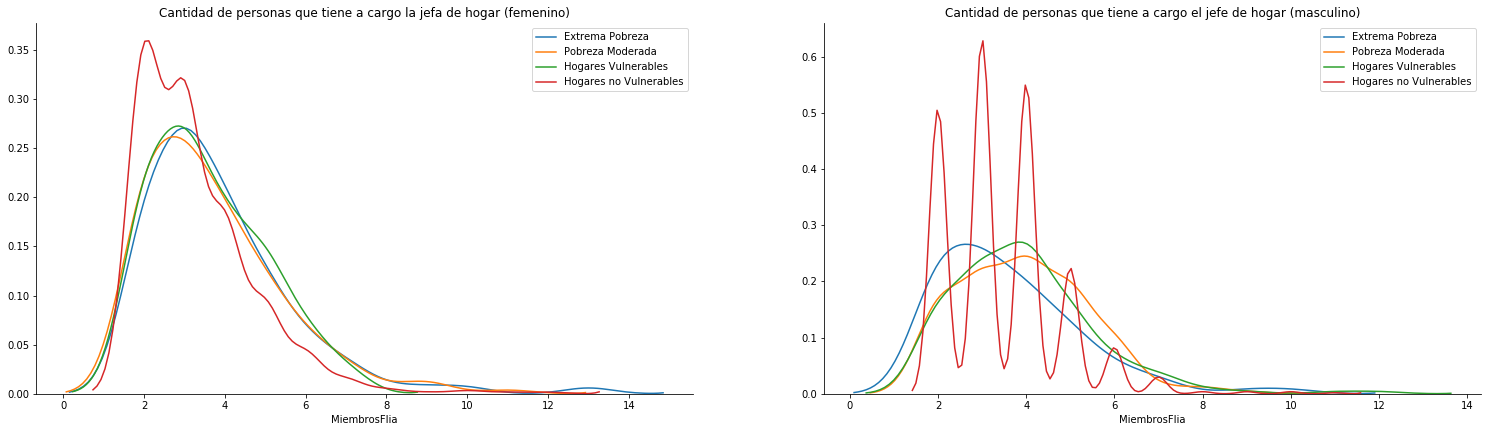

In [15]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)

plt.figure(figsize=(40,15))


plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==1)]['MiembrosFlia'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==2)]['MiembrosFlia'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==3)]['MiembrosFlia'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==4)]['MiembrosFlia'], bins=10 ,label='Hogares no Vulnerables', hist=False)

plt.title('Cantidad de personas que tiene a cargo la jefa de hogar (femenino)')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(0,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==1)]['MiembrosFlia'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==2)]['MiembrosFlia'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==3)]['MiembrosFlia'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==4)]['MiembrosFlia'], bins=10 ,label='Hogares no Vulnerables', hist=False)
plt.title('Cantidad de personas que tiene a cargo el jefe de hogar (masculino)')
plt.legend()
sns.despine()


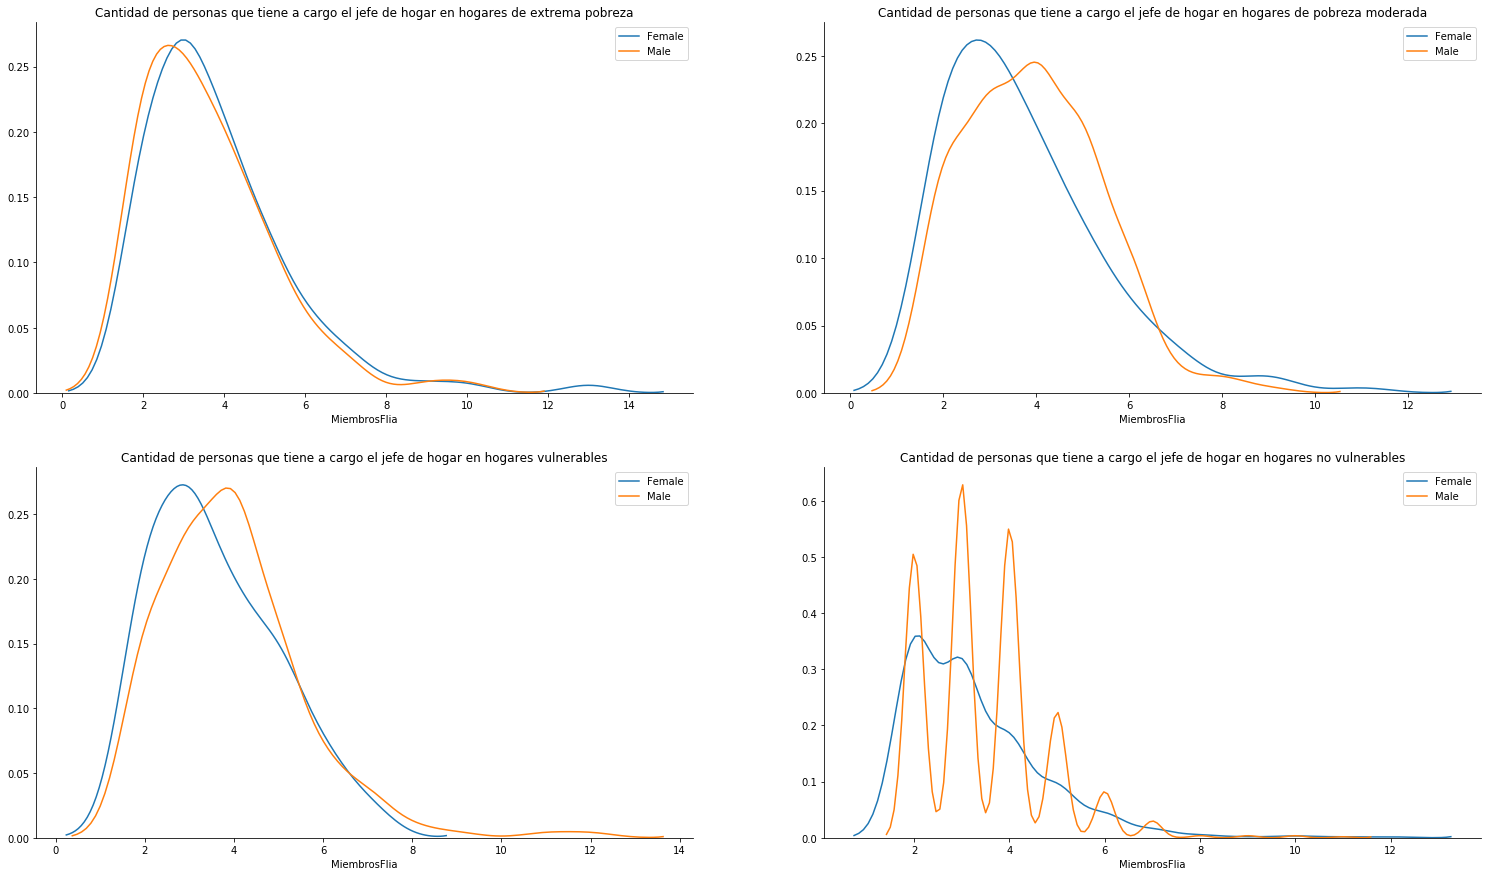

In [16]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','parentesco2','parentesco3','parentesco4','Genero', 'Target']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
plt.figure(figsize=(40,15))


plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==1)]['MiembrosFlia'], bins=10 ,label='Female', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==1)]['MiembrosFlia'], bins=10 ,label='Male', hist=False)
plt.title('Cantidad de personas que tiene a cargo el jefe de hogar en hogares de extrema pobreza')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(0,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==2)]['MiembrosFlia'], bins=10 ,label='Female', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==2)]['MiembrosFlia'], bins=10 ,label='Male', hist=False)
plt.title('Cantidad de personas que tiene a cargo el jefe de hogar en hogares de pobreza moderada')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(1,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==3)]['MiembrosFlia'], bins=10 ,label='Female', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==3)]['MiembrosFlia'], bins=10 ,label='Male', hist=False)
plt.title('Cantidad de personas que tiene a cargo el jefe de hogar en hogares vulnerables')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(1,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==4)]['MiembrosFlia'], bins=10 ,label='Female', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==4)]['MiembrosFlia'], bins=10 ,label='Male', hist=False)
plt.title('Cantidad de personas que tiene a cargo el jefe de hogar en hogares no vulnerables')
plt.legend()
sns.despine()

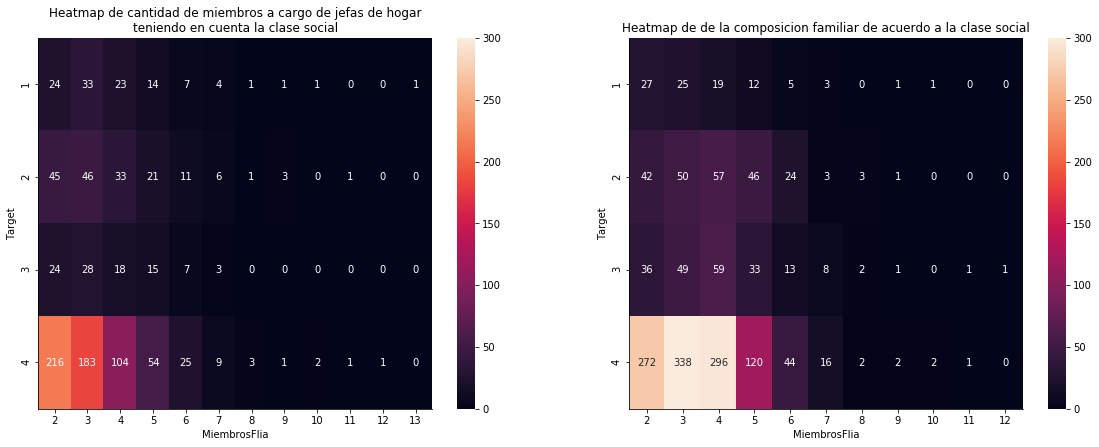

In [17]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)

plt.figure(figsize=(30,15))

plt.subplot2grid((2,3),(0,0))
exp = filtered_idhogar[(filtered_idhogar['Genero']=='female')&(filtered_idhogar['parentesco1']==1)][['Target', 'MiembrosFlia']]
exp = exp.pivot_table(index='Target', columns='MiembrosFlia', aggfunc=len, fill_value=0)
sns.heatmap(exp,vmin=0, vmax=300,annot=True, fmt="d")
plt.title("Heatmap de cantidad de miembros a cargo de jefas de hogar\nteniendo en cuenta la clase social")
sns.despine()


plt.subplot2grid((2,3),(0,1))
exp = filtered_idhogar[(filtered_idhogar['Genero']=='male')&(filtered_idhogar['parentesco1']==1)][['Target', 'MiembrosFlia']]
exp = exp.pivot_table(index='Target', columns='MiembrosFlia', aggfunc=len, fill_value=0)
sns.heatmap(exp, vmin=0, vmax=300,annot=True, fmt="d")
plt.title("Heatmap de de la composicion familiar de acuerdo a la clase social")
sns.despine()


In [18]:
filtered_idhogar[(filtered_idhogar['Genero']=='female')&(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Target']==4)]['MiembrosFlia'].count()

599

**Conclusion**<br>


---
* Mayor concentracion de familias en la clase alta (Target = 4)
* Por la diferencia en cantidad de hogares en cada clase, no se puede inferir que por ser de una clase social tiene mas o menos miembros a cargo.
* Salvo en hogares de extrema pobreza, si el jefe de hogar es hombre, la cantidad de miembros a cargo del jefe de hogar es mayor en clases sociales mas altas

#### Analisis de jef@s de hogar en relacion a la cantidad de familiares a cargo teniendo en cuenta el target y la region

In [19]:
_ds.Region.unique()


array(['Central', 'Chorotega', 'Pacífico Central', 'Brunca',
       'Huetar Atlántica', 'Huetar Norte'], dtype=object)

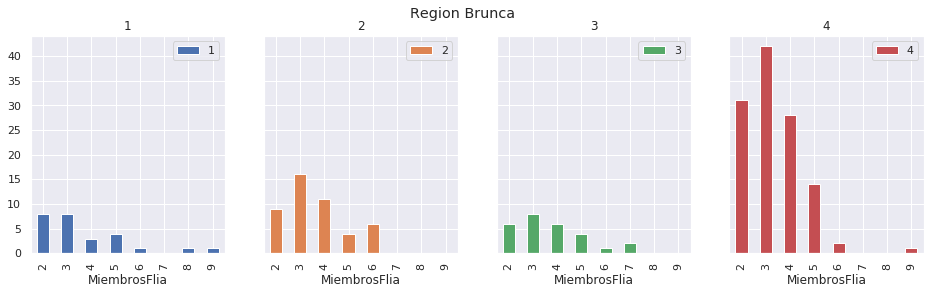

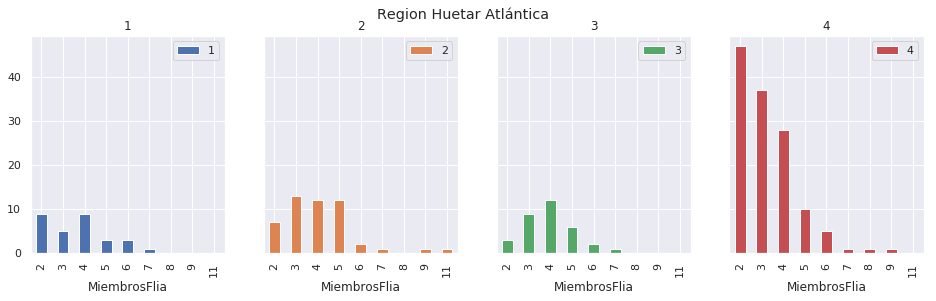

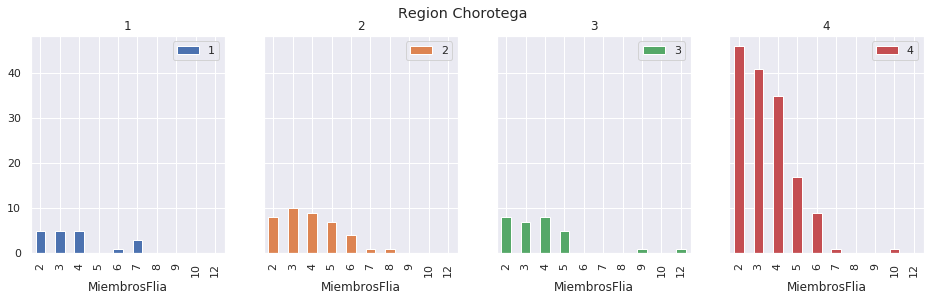

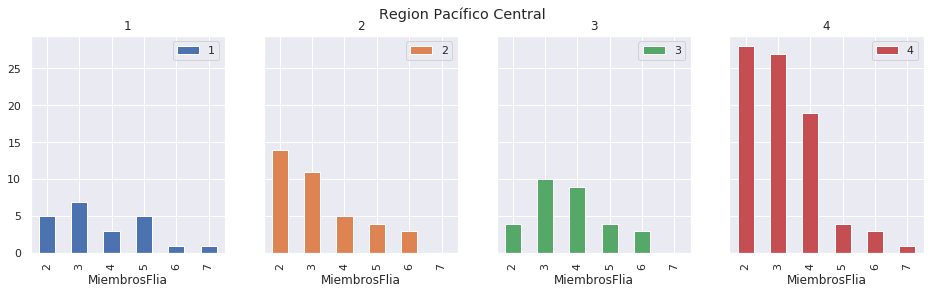

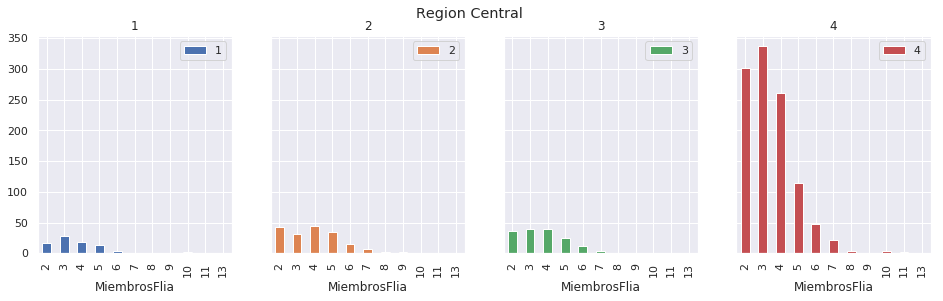

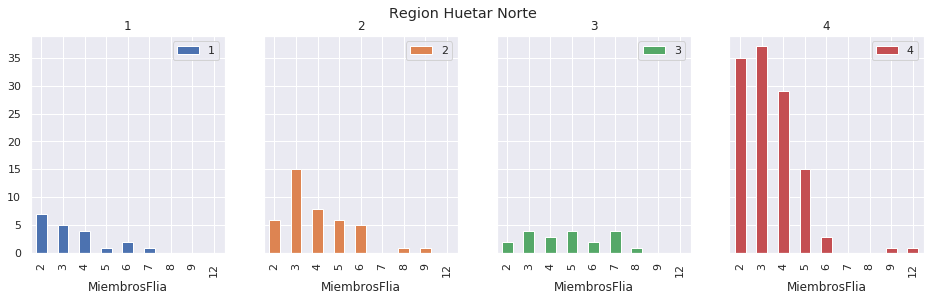

In [97]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)

region_list = filtered_idhogar.Region.unique()

for index, region in enumerate(region_list):
  filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Region']==region)].groupby(['MiembrosFlia','Target'])['MiembrosFlia'].count().unstack('Target').plot(kind='bar',stacked=True,subplots=True, layout=(1,4),sharex=True, sharey=True, legend=True, grid=True, title="Region "+region, figsize=(16,4))

plt.show()

In [21]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby([ 'Region', 'Zona','Genero','Target'])['MiembrosFlia'].agg(['min','max','mean','median',percentile(50),percentile(75), percentile(95)])

min  max      mean  median  \
Region           Zona   Genero Target                               
Brunca           Rural  female 1         2    9  4.285714     3.0   
                               2         2    6  3.777778     3.0   
                               3         2    5  3.428571     3.0   
                               4         2    6  3.352941     3.0   
                        male   1         2    6  3.000000     2.0   
                               2         2    6  3.863636     4.0   
                               3         2    7  4.222222     4.0   
                               4         2    5  3.222222     3.0   
                 Urbana female 1         3    8  4.800000     5.0   
                               2         2    4  3.200000     3.0   
                               3         2    3  2.500000     2.5   
                               4         2    6  3.115385     3.0   
                        male   1         2    4  2.800000     3.0   
                               2         2    5  3.100000     3.0   
                               3         2    7  4.000000     4.0   
                               4         2    9  3.600000     3.0   
Central          Rural  female 1         3    4  3.333333     3.0   
                               2         2    5  2.875000     3.0   
                               3         2    7  3.727273     3.0   
                               4         2    6  3.142857     3.0   
                        male   1         3   10  4.545455     3.0   
                               2         2    6  3.714286     4.0   
                               3         2   11  3.695652     3.0   
                               4         2    7  3.519231     3.0   
                 Urbana female 1         2   13  3.785714     3.0   
                               2         2    9  4.029851     4.0   
                               3         2    7  3.755556     4.0   
                               4         2   11  3.312834     3.0   
                        male   1         2    7  3.807692     4.0   
                               2         2    9  3.987952     4.0   
                               3         2    8  3.746835     4.0   
                               4         2   11  3.515571     3.0   
Chorotega        Rural  female 1         2    6  4.000000     4.0   
                               2         2    4  2.727273     3.0   
                               3         2    5  2.750000     2.0   
                               4         2    6  3.000000     3.0   
                        male   1         2    7  3.666667     3.0   
                               2         2    6  4.166667     4.0   
                               3         2    5  3.250000     3.0   
                               4         2    7  3.324324     3.0   
                 Urbana female 1         2    7  3.600000     3.0   
                               2         2    6  3.571429     3.0   
                               3         3    3  3.000000     3.0   
                               4         2    6  3.302326     3.0   
                        male   1         2    7  4.000000     3.5   
                               2         3    8  5.100000     5.0   
                               3         2   12  4.411765     4.0   
                               4         2   10  3.705882     4.0   
Huetar Atlántica Rural  female 1         2    6  4.000000     4.0   
                               2         2   11  4.285714     3.0   
                               3         3    5  4.000000     4.0   
                               4         2    4  2.538462     2.0   
                        male   1         2    6  3.200000     2.0   
                               2         2    6  3.777778     3.0   
                               3         2    5  3.538462     4.0   
                               4         2    6  3.361702     3.0   
                 Urbana female 1     

 En el siguiente grafico se muestra el p

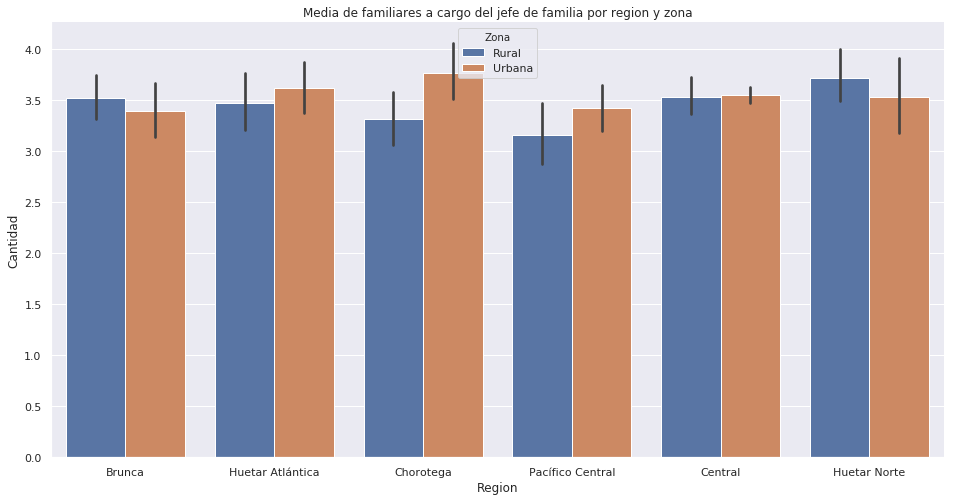

In [98]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x="Region", hue="Zona",y="MiembrosFlia" ,data=filtered_idhogar[filtered_idhogar['parentesco1']==1])
ax.set( ylabel='Cantidad', xlabel='Region',title='Media de familiares a cargo del jefe de familia por region y zona')
sns.despine()

* No hay mayor cantidad de familiares a cargo entre zona rural y zona urbana.

In [99]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Region','Zona'])['MiembrosFlia'].describe()

count      mean       std  min  25%  50%   75%   max
Region           Zona                                                         
Brunca           Rural    125.0  3.520000  1.317378  2.0  3.0  3.0  4.00   9.0
                 Urbana    92.0  3.391304  1.333891  2.0  2.0  3.0  4.00   9.0
Central          Rural    219.0  3.529680  1.398815  2.0  3.0  3.0  4.00  11.0
                 Urbana  1294.0  3.551005  1.442406  2.0  2.0  3.0  4.00  13.0
Chorotega        Rural    101.0  3.316832  1.295613  2.0  2.0  3.0  4.00   7.0
                 Urbana   138.0  3.760870  1.663495  2.0  3.0  4.0  4.75  12.0
Huetar Atlántica Rural    108.0  3.472222  1.462672  2.0  2.0  3.0  4.00  11.0
                 Urbana   134.0  3.619403  1.449889  2.0  2.0  3.0  4.00   9.0
Huetar Norte     Rural    135.0  3.718519  1.623759  2.0  3.0  3.0  5.00  12.0
                 Urbana    68.0  3.529412  1.480929  2.0  2.0  3.0  4.00   9.0
Pacífico Central Rural     57.0  3.157895  1.130573  2.0  2.0  3.0  4.00   6.0
                 Urbana   114.0  3.421053  1.275326  2.0  2.0  3.0  4.00   7.0

### Edad de los jefes de hogar


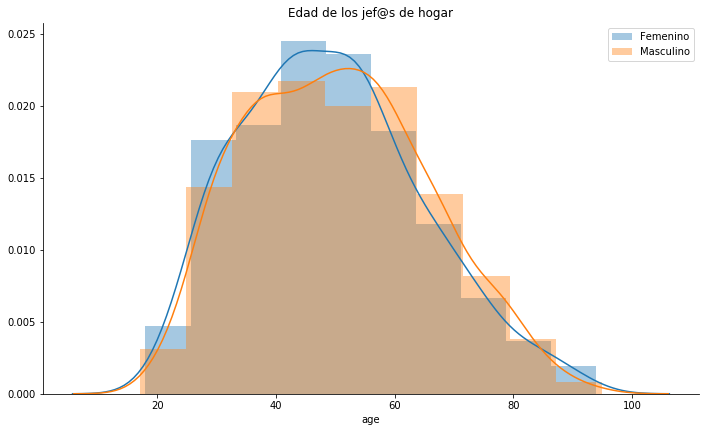

In [24]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)

plt.figure(figsize=(40,15))


plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')]['age'], bins=10 ,label='Femenino')
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')]['age'], bins=10 ,label='Masculino')

plt.title('Edad de los jef@s de hogar')
plt.legend()

sns.despine()

In [103]:
def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile


filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Genero'])['age'].agg(['min','max','mean','median',percentile(50),percentile(75), percentile(95)])

,min,max,mean,median,50-th percentile,75-th percentile,95-th percentile
Genero,,,,,,,
female,18,94,49.313402,49,49,59,76.55
male,17,95,50.411146,50,50,61,77.30


**Conclusion:**
* El jefe de familia mas chico tiene 17 años, la jefa de familia mas chica tiene 18 años de edad.
* No hay mucha diferencia entre la media de edad cuando el jefe es femenino o masculino.

#### Comparacion de la edad de l@s jefes entre zona urbana y rural.

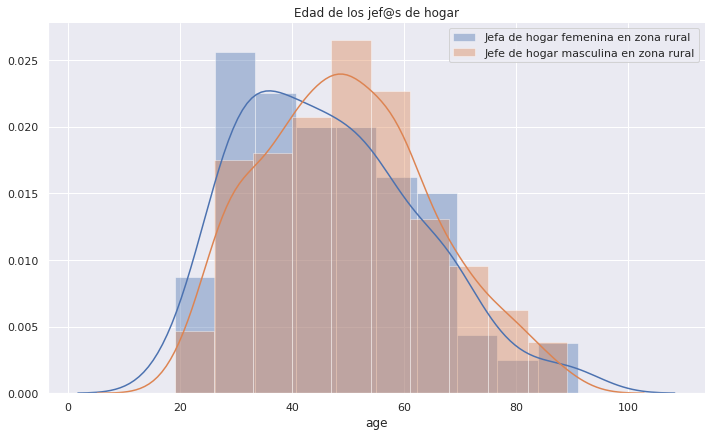

In [100]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]

plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Zona']=='Rural')]['age'], bins=10 ,label='Jefa de hogar femenina en zona rural')
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Zona']=='Rural')]['age'], bins=10 ,label='Jefe de hogar masculina en zona rural')

plt.title('Edad de los jef@s de hogar en zona rural')
plt.legend()

sns.despine()

In [106]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')].groupby(['Genero'])['age'].agg(['min','max','mean','std','median',percentile(75), percentile(95)])

,min,max,mean,std,median,75-th percentile,95-th percentile
Genero,,,,,,,
female,19,91,46.774775,16.014521,45,57,74.95
male,19,89,49.726577,15.195526,49,60,77.90


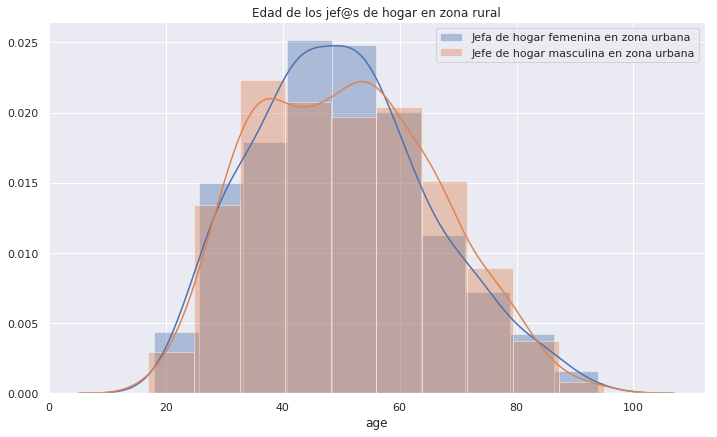

In [101]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]

plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Zona']=='Urbana')]['age'], bins=10 ,label='Jefa de hogar femenina en zona urbana')
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Zona']=='Urbana')]['age'], bins=10 ,label='Jefe de hogar masculina en zona urbana')

plt.title('Edad de los jef@s de hogar en zona urbana')
plt.legend()

sns.despine()

In [107]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')].groupby(['Genero'])['age'].agg(['min','max','mean','std','median',percentile(75), percentile(95)])

,min,max,mean,std,median,75-th percentile,95-th percentile
Genero,,,,,,,
female,18,94,50.066845,15.031634,49,60,77
male,17,95,50.739011,15.390446,50,62,77


#### Comparacion de la edad de l@s jefes entre regiones.

In [28]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Region'])['age'].agg(['min','max','mean','std','median',percentile(75), percentile(95)])

,min,max,mean,std,median,75-th percentile,95-th percentile
Region,,,,,,,
Brunca,19,90,48.451613,14.917015,47,58.00,76.20
Central,17,95,51.309319,15.469573,51,62.00,78.40
Chorotega,18,91,50.686192,14.753359,50,60.00,77.00
Huetar Atlántica,22,87,47.016529,14.700599,46,57.75,72.95
Huetar Norte,19,89,47.083744,15.456354,46,58.00,72.90
Pacífico Central,21,82,47.093567,14.707442,46,59.00,70.00


#### Comparacion de l@s jef@s de hogar teniendo en cuenta edad y target

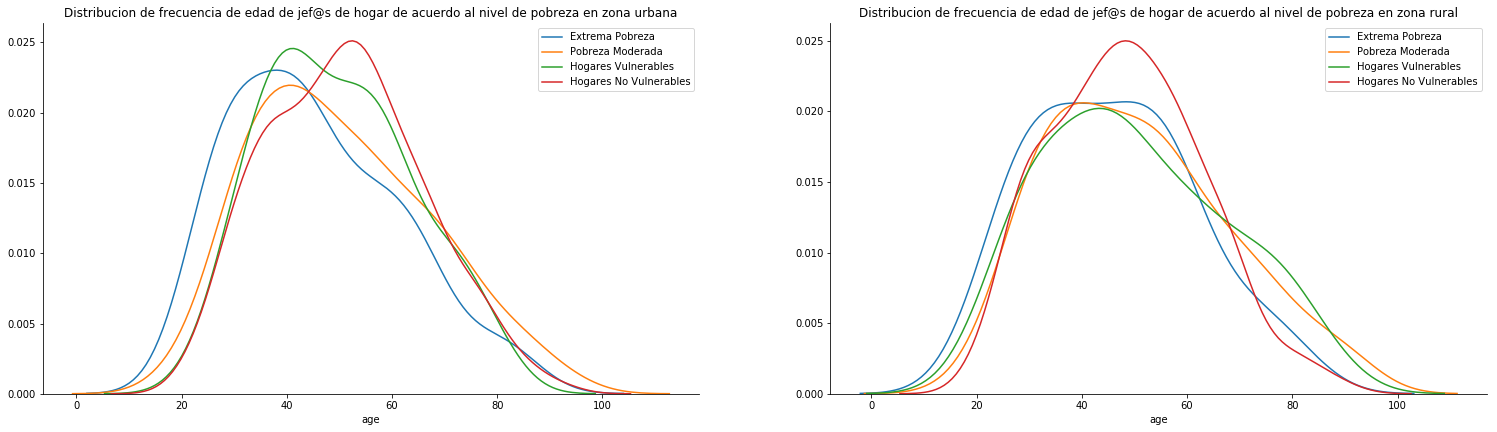

In [29]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Genero', 'Target'])['age'].agg(['min','max','mean','std','median',percentile(75), percentile(95)])
plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jef@s de hogar de acuerdo al nivel de pobreza en zona urbana')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(0,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jef@s de hogar de acuerdo al nivel de pobreza en zona rural')
plt.legend()
sns.despine()

In [30]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Target','Zona'])['age'].agg(['min','max','mean','std','median',percentile(75), percentile(95)])

min  max       mean        std  median  75-th percentile  \
Target Zona                                                               
1      Rural    19   82  45.929577  15.572250    45.0             56.50   
       Urbana   21   85  45.465649  15.870775    43.0             57.00   
2      Rural    19   91  50.657143  17.180285    49.5             62.00   
       Urbana   17   95  50.438735  16.885269    48.0             62.00   
3      Rural    21   87  50.110000  17.301191    48.0             62.25   
       Urbana   21   83  49.772727  14.195297    49.0             60.00   
4      Rural    19   89  48.449309  14.388328    48.0             58.00   
       Urbana   18   94  51.100954  14.904581    51.0             61.00   

               95-th percentile  
Target Zona                      
1      Rural              73.50  
       Urbana             76.50  
2      Rural              82.00  
       Urbana             81.40  
3      Rural              78.15  
       Urbana             74.15  
4      Rural              72.00  
       Urbana             77.00

**Conclusion**
* En clases sociales mas bajas, la edad en que se hacen cargo del hogar es mas baja, ya sea si viven en zona urbana como en zona rural.


#### Comparacion de jef@s de hogar teniendo en cuenta genero, edad y target

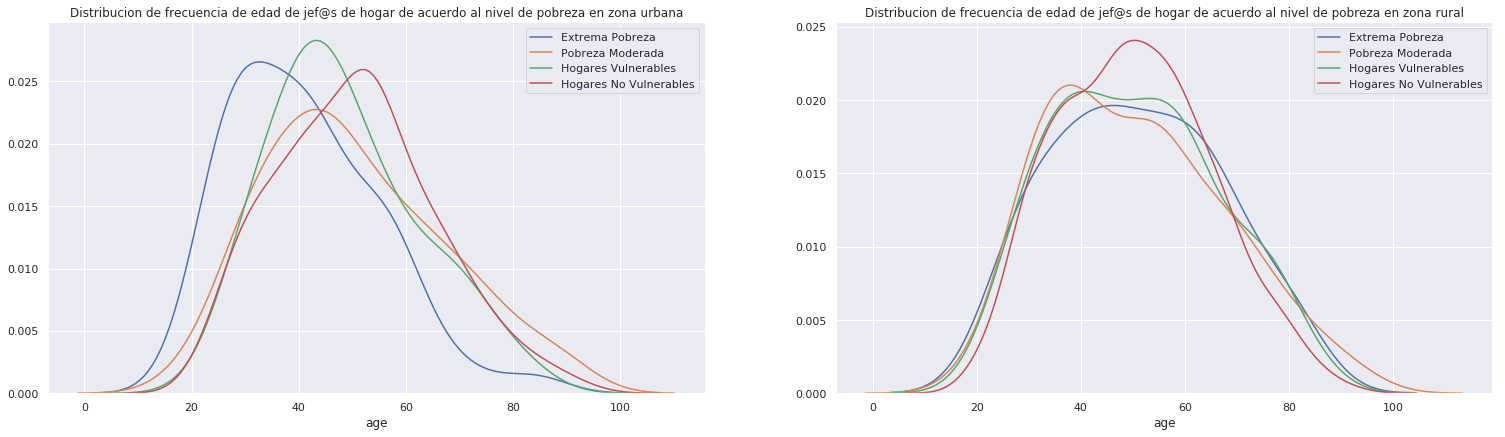

In [111]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)

plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jef@s de hogar de acuerdo al nivel de pobreza en zona urbana')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(0,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jef@s de hogar de acuerdo al nivel de pobreza en zona rural')
plt.legend()
sns.despine()

In [32]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Genero', 'Target'])['age'].agg(['min','max','mean','std','median',percentile(75), percentile(95)])

min  max       mean        std  median  75-th percentile  \
Genero Target                                                             
female 1        19   85  41.100917  13.937655      39             52.00   
       2        18   91  50.335329  16.826045      48             62.00   
       3        23   84  48.568421  13.901364      46             57.50   
       4        21   94  50.641068  14.887641      51             60.00   
male   1        24   83  50.935484  16.116294      50             64.00   
       2        17   95  50.650442  17.110541      50             62.75   
       3        21   87  50.502463  15.878678      50             61.00   
       4        18   93  50.300091  14.780493      50             60.00   

               95-th percentile  
Genero Target                    
female 1                  63.60  
       2                  82.00  
       3                  74.30  
       4                  76.10  
male   1                  80.00  
       2                  81.75  
       3                  77.00  
       4                  76.00

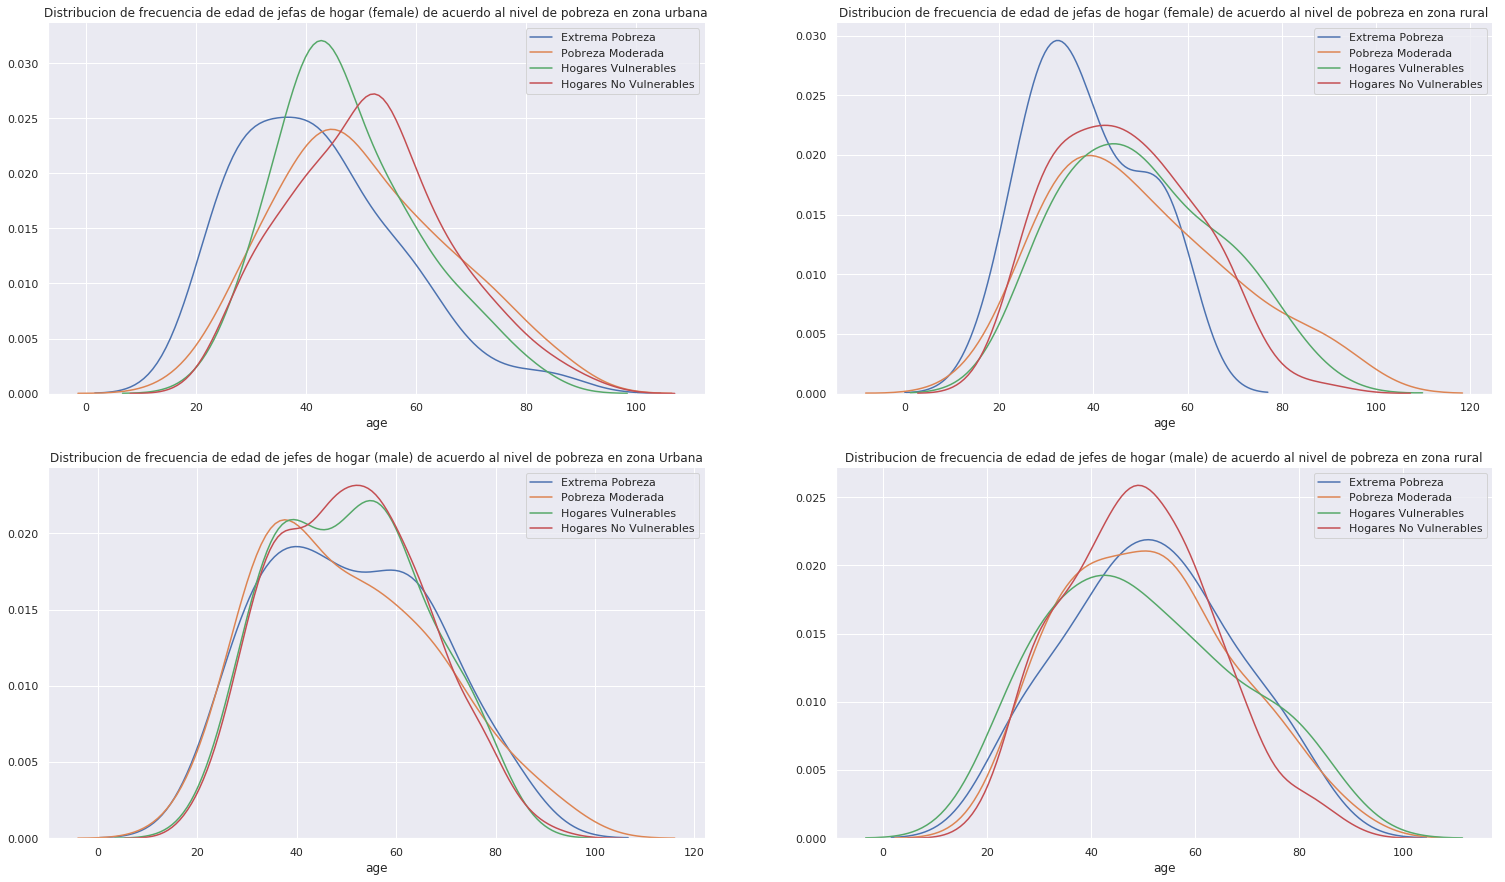

In [112]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','age']]
filtered_idhogar['MiembrosFlia'] = filtered_idhogar.groupby(['idhogar'])['Id'].transform(len)

plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jefas de hogar (female) de acuerdo al nivel de pobreza en zona urbana')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(0,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jefas de hogar (female) de acuerdo al nivel de pobreza en zona rural')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(1,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Urbana')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jefes de hogar (male) de acuerdo al nivel de pobreza en zona Urbana')
plt.legend()
sns.despine()

plt.subplot2grid((2,3),(1,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==1)]['age'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==2)]['age'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==3)]['age'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Zona']=='Rural')&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==4)]['age'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de edad de jefes de hogar (male) de acuerdo al nivel de pobreza en zona rural')
plt.legend()
sns.despine()

### Comparacion de jef@s de hogar teniendo en cuenta genero y años de eduacacion

**Educación General Básica Primaria (06 a 12 años)**<br>
Es la que asegura la correcta alfabetización, es decir, la que enseña a leer, escribir, cálculo básico y algunos de los conceptos culturales considerados imprescindibles. Su finalidad es proporcionar a todos los alumnos una formación común que haga posible el desarrollo de las capacidades individuales motrices, de equilibrio personal, de relación y de actuación social con la adquisición de los elementos básicos culturales, los aprendizajes relativos mencionados anteriormente.

**Educación Secundaria (13 a 17 años)**<br>
Es la que tiene como objetivo capacitar al alumno para proseguir estudios superiores. Al terminar la educación secundaria se pretende que el alumno desarrolle las suficientes habilidades, valores y actitudes para lograr un buen desenvolvimiento en la sociedad. Estos son los Liceos académicos Diurnos y Nocturnos (III Ciclo y Educación Diversificada). Para ingresar a este Ciclo, se requiere haber aprobado el I y II Ciclos. Estos centros atienden las necesidades educativas de los alumnos en aquellas instituciones denominadas Liceos, o Colegios con el propósito fundamental de proporcionar a los estudiantes los conocimientos básicos necesarios que les permitan interpretar, comprender y administrar la realidad socio-económica y cultural del país.

**Educación Diversificada**<br>
Como se indicó, la educación obligatoria comprende hasta el Tercer Ciclo de la Educación General Básica, de tal suerte que la Educación Diversificada comprende el IV Ciclo único de la Educación Diversificada.
La Educación Diversificada, como su nombre indica, busca ofrecer a los estudiantes diversas opciones que tiendan a satisfacer sus necesidades e intereses en educación. Específicamente, la Educación Diversificada se divide en tres grandes ramas, a saber: Educación Académica, Educación Técnica y Educación Artística, las que a su vez se subdividen en modalidades y éstas en especialidades.

La Rama Académica concluye con el otorgamiento del título de Bachiller, siempre y cuando el estudiante apruebe los exámenes finales de Bachillerato en cualquiera de las tres convocatorias anuales, título que legitima para ingresar a la educación superior.

La Rama Académica comprende únicamente dos años (décimo y undécimo).

En cuanto al plan de estudios de la Educación Diversificada Académica, se comprende las asignaturas de Español, Estudios Sociales, Educación Cívica, Matemática, Física, Química, Biología, Idioma Extranjero, Inglés o Francés, Artes Plásticas, Educación física, Educación religiosa, Psicología, filosofía y tecnología.

**Educación Universitaria**<br>
Esta tiene como objetivo capacitar a cada persona, en las distintas ramas en que a futuro podrá trabajar. La idea es crear verdaderos profesionales, gente que se adapte a las necesidades sociales del país y que con el conocimiento aprendido ayuden en el crecimiento, profesional, intelectual y económico de todo el país; así como la capacidad de cada persona de desarrollarse ante la vida con una calidad de vida superior.


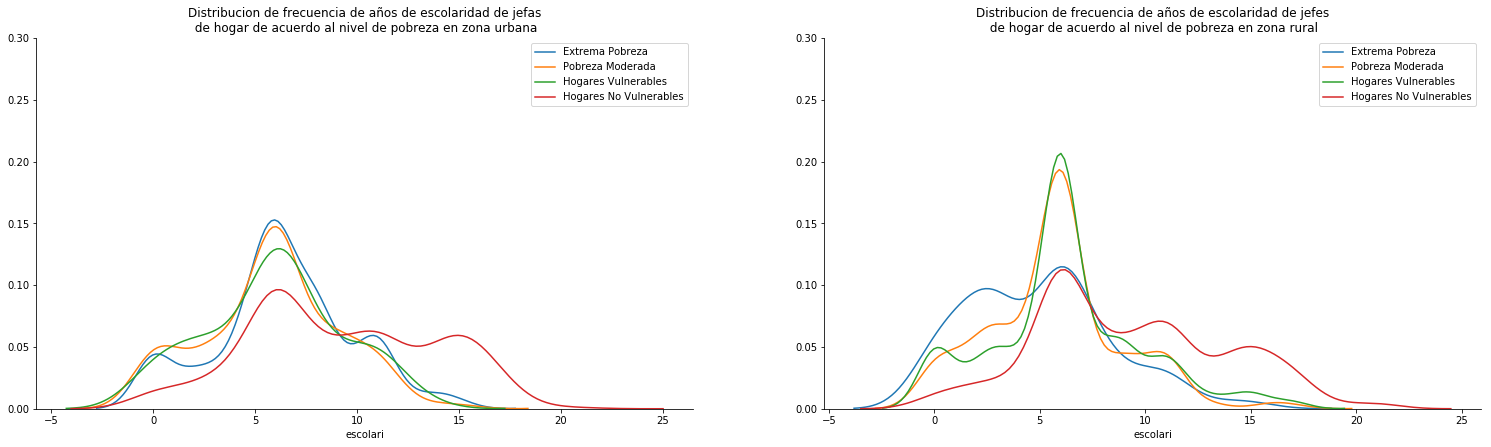

In [33]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','instlevel8','instlevel9','escolari']]
plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==1)]['escolari'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==2)]['escolari'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==3)]['escolari'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&(filtered_idhogar['Target']==4)]['escolari'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de años de escolaridad de jefas\n de hogar de acuerdo al nivel de pobreza en zona urbana')
plt.legend()
plt.ylim(0, 0.3)
sns.despine()

plt.subplot2grid((2,3),(0,1))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==1)]['escolari'], bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==2)]['escolari'], bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==3)]['escolari'], bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&(filtered_idhogar['Target']==4)]['escolari'], bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de años de escolaridad de jefes\n de hogar de acuerdo al nivel de pobreza en zona rural')
plt.legend()
plt.ylim(0, 0.3)

sns.despine()


**Conclusión**
* Mayor Concentracion de jefes de hogar que solo termino el nivel primario en nivel de pobreza extrema y pobreza moderada.
* Se observa una mayor dispersion en hogares vulnerables y hogares no vulnerables por lo que hay mayor cantidad de jefes de hogar que han completado el secundario o secundario tecnico (un año mas que el nivel secundario normal)
* Se observa los jefes de hogares de hogares no vulnerables son aquellos que alcanzan un nivel de eduación superio o universitario.


In [34]:
def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile
filtered_idhogar[filtered_idhogar['parentesco1']==1].groupby(['Genero', 'Target'])['escolari'].agg(['min','max','mean','std','median',percentile(75), percentile(95)])

min  max      mean       std  median  75-th percentile  \
Genero Target                                                           
female 1         0   15  6.394495  3.407558       6              8.00   
       2         0   15  5.826347  3.303853       6              8.00   
       3         0   13  5.936842  3.328825       6              8.00   
       4         0   21  9.255426  4.539665       9             13.00   
male   1         0   15  4.967742  3.421326       6              6.00   
       2         0   17  5.756637  3.206670       6              6.75   
       3         0   17  6.256158  3.608763       6              8.00   
       4         0   21  9.293687  4.518858       9             12.00   

               95-th percentile  
Genero Target                    
female 1                   11.0  
       2                   11.0  
       3                   11.0  
       4                   16.0  
male   1                   11.0  
       2                   11.0  
       3                   12.9  
       4                   17.0

**Conclusión**
* En hogares no vulnerables se ve realmente la diferencia de años de educación, ya que en las 3 clases más bajas la media e inclusive la mediana tienen prácticamente el mismo valor. 

##### Comparacion de jef@s de hogar teniendo en cuenta genero y años de educación universitaria

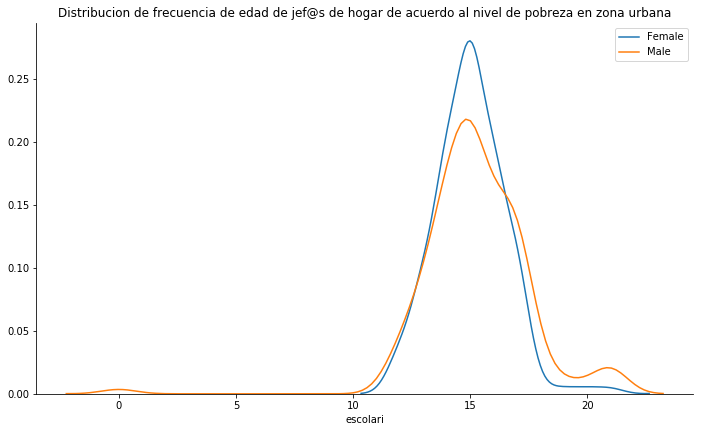

In [35]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','instlevel8','instlevel9','escolari']]

plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='female')&((filtered_idhogar['instlevel8']==1)|(filtered_idhogar['instlevel9']==1))]['escolari'], bins=10 ,label='Female', hist=False)
sns.distplot(filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['Genero']=='male')&((filtered_idhogar['instlevel8']==1)|(filtered_idhogar['instlevel9']==1))]['escolari'], bins=10 ,label='Male', hist=False)
plt.title('Distribucion de frecuencia de edad de jef@s de hogar de acuerdo al nivel de pobreza en zona urbana')
plt.legend()
sns.despine()


In [36]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','instlevel8','instlevel9','escolari']]

filtered_idhogar[(filtered_idhogar['parentesco1']==1)&((filtered_idhogar['instlevel8']==1)|(filtered_idhogar['instlevel9']==1))].groupby(['Genero','Target','Zona'])['escolari'].agg(['count','min','max','mean','std','median',percentile(75), percentile(95)])

count  min  max       mean       std  median  \
Genero Target Zona                                                   
female 1      Urbana      4   13   15  14.000000  0.816497      14   
       2      Urbana      3   12   15  13.666667  1.527525      14   
       3      Rural       1   13   13  13.000000       NaN      13   
              Urbana      1   13   13  13.000000       NaN      13   
       4      Rural      26   12   17  15.000000  1.232883      15   
              Urbana    143   12   21  15.104895  1.495125      15   
male   1      Rural       1   15   15  15.000000       NaN      15   
              Urbana      1   14   14  14.000000       NaN      14   
       2      Urbana      5   13   17  15.000000  1.870829      16   
       3      Rural       5   12   16  13.800000  1.483240      14   
              Urbana      9   12   17  14.555556  1.878238      15   
       4      Rural      42   12   21  15.166667  2.070898      15   
              Urbana    244    0   21  15.344262  2.336930      15   

                      75-th percentile  95-th percentile  
Genero Target Zona                                        
female 1      Urbana             14.25             14.85  
       2      Urbana             14.50             14.90  
       3      Rural              13.00             13.00  
              Urbana             13.00             13.00  
       4      Rural              16.00             17.00  
              Urbana             16.00             17.00  
male   1      Rural              15.00             15.00  
              Urbana             14.00             14.00  
       2      Urbana             16.00             16.80  
       3      Rural              14.00             15.60  
              Urbana             15.00             17.00  
       4      Rural              17.00             18.95  
              Urbana             17.00             19.00

### Comparacion de jef@s de hogar teniendo en cuenta la renta


In [37]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','v2a1']]
filtered_idhogar[filtered_idhogar['parentesco1']==1].count()


Id             2585
idhogar        2585
parentesco1    2585
Genero         2585
Target         2585
Region         2585
Zona           2585
v2a1            724
dtype: int64

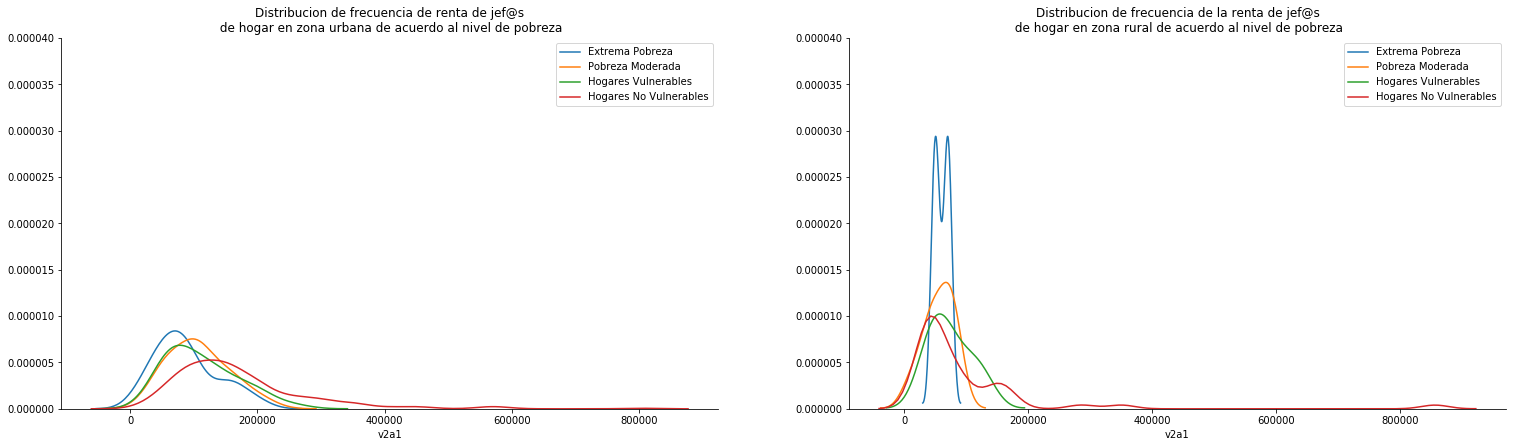

In [38]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','v2a1','TipoVivienda']]

ds_filtered =filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['TipoVivienda']=='tipovivi3')]
plt.figure(figsize=(40,15))

plt.subplot2grid((2,3),(0,0))
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Urbana')&(ds_filtered['Target']==1)]['v2a1'].dropna(), bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Urbana')&(ds_filtered['Target']==2)]['v2a1'].dropna(), bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Urbana')&(ds_filtered['Target']==3)]['v2a1'].dropna(), bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Urbana')&(ds_filtered['Target']==4)]['v2a1'].dropna(), bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de renta de jef@s\n de hogar en zona urbana de acuerdo al nivel de pobreza')
plt.legend()
plt.ylim(0, 0.00004)

sns.despine()

plt.subplot2grid((2,3),(0,1))
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Rural')&(ds_filtered['Target']==1)&(ds_filtered['Region']=='Chorotega')]['v2a1'].dropna(), bins=10 ,label='Extrema Pobreza', hist=False)
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Rural')&(ds_filtered['Target']==2)]['v2a1'].dropna(), bins=10 ,label='Pobreza Moderada', hist=False)
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Rural')&(ds_filtered['Target']==3)]['v2a1'].dropna(), bins=10 ,label='Hogares Vulnerables', hist=False)
sns.distplot(ds_filtered[(ds_filtered['Zona']=='Rural')&(ds_filtered['Target']==4)]['v2a1'].dropna(), bins=10 ,label='Hogares No Vulnerables', hist=False)
plt.title('Distribucion de frecuencia de la renta de jef@s\n de hogar en zona rural de acuerdo al nivel de pobreza')
plt.legend()
plt.ylim(0, 0.00004)

sns.despine()


In [39]:
filtered_idhogar = _ds[_ds.idhogar.duplicated(keep=False)].sort_values(by='idhogar')[['Id', 'idhogar','parentesco1','Genero', 'Target', 'Region', 'Zona','v2a1','TipoVivienda']]
def percentile(n):
    def _percentile(x):
        return np.percentile(x, n)
    _percentile.__name__ = '{}-th percentile'.format(n)
    return _percentile

filtered_idhogar[(filtered_idhogar['parentesco1']==1)&(filtered_idhogar['TipoVivienda']=='tipovivi3')].groupby(['Target','Zona','Region','TipoVivienda'])['v2a1'].agg(['count','min','max','mean','std','median',percentile(75), percentile(95)])

count       min       max  \
Target Zona   Region           TipoVivienda                              
1      Rural  Brunca           tipovivi3         1   80000.0   80000.0   
              Central          tipovivi3         3   40000.0   52831.0   
              Chorotega        tipovivi3         2   50000.0   70000.0   
              Huetar Atlántica tipovivi3         1   50000.0   50000.0   
              Huetar Norte     tipovivi3         1   35000.0   35000.0   
       Urbana Brunca           tipovivi3         2   50000.0  100000.0   
              Central          tipovivi3        11   20000.0  175000.0   
              Chorotega        tipovivi3         1   80000.0   80000.0   
              Huetar Atlántica tipovivi3         5   15000.0   85000.0   
              Pacífico Central tipovivi3         5   40000.0  200000.0   
2      Rural  Brunca           tipovivi3         1   12000.0   12000.0   
              Central          tipovivi3         2   50000.0   80000.0   
              Chorotega        tipovivi3         1   40000.0   40000.0   
              Huetar Atlántica tipovivi3         1   40000.0   40000.0   
              Huetar Norte     tipovivi3         3   70000.0   80000.0   
       Urbana Brunca           tipovivi3         4   25000.0  100000.0   
              Central          tipovivi3        37   50000.0  200000.0   
              Chorotega        tipovivi3         4   50000.0  140000.0   
              Huetar Atlántica tipovivi3         6   20000.0   90000.0   
              Huetar Norte     tipovivi3         1  110000.0  110000.0   
              Pacífico Central tipovivi3         7   40000.0  225000.0   
3      Rural  Central          tipovivi3         1  120000.0  120000.0   
              Huetar Atlántica tipovivi3         2   45000.0   80000.0   
              Pacífico Central tipovivi3         1   50000.0   50000.0   
       Urbana Brunca           tipovivi3         4   30000.0   80000.0   
              Central          tipovivi3        30   50000.0  260000.0   
              Chorotega        tipovivi3         5   40000.0  175000.0   
              Huetar Atlántica tipovivi3         2   90000.0  120000.0   
              Huetar Norte     tipovivi3         2   50000.0   60000.0   
              Pacífico Central tipovivi3         4   50000.0   80000.0   
4      Rural  Brunca           tipovivi3         5   25000.0  120000.0   
              Central          tipovivi3        11   40000.0  855810.0   
              Chorotega        tipovivi3         6   30000.0  285270.0   
              Huetar Atlántica tipovivi3         5   30000.0  350000.0   
              Huetar Norte     tipovivi3         9   25000.0   70000.0   
              Pacífico Central tipovivi3         9   45000.0  171162.0   
       Urbana Brunca           tipovivi3         9   50000.0  100000.0   
              Central          tipovivi3       205   16000.0  800000.0   
              Chorotega        tipovivi3        18   30000.0  300000.0   
              Huetar Atlántica tipovivi3        12   35000.0  200000.0   
              Huetar Norte     tipovivi3        14   50000.0  170000.0   
              Pacífico Central tipovivi3         7   35000.0  350000.0   

                                                      mean            std  \
Target Zona   Region           TipoVivienda                                 
1      Rural  Brunca           tipovivi3      80000.000000            NaN   
              Central          tipovivi3      47610.333333    6741.032587   
              Chorotega        tipovivi3      60000.000000   14142.135624   
              Huetar Atlántica tipovivi3      50000.000000            NaN   
              Huetar Norte     tipovivi3      35000.000000            NaN   
       Urbana Brunca           tipovivi3      75000.000000   35355.339059   
              Central          tipovivi3     105909.090909   48878.327601   
              Chorotega        tipovivi3      80000.000000            NaN   
              Huet

### END


In [42]:
# Cantidad de personas por genero
_ds['Genero'].value_counts()

female    4937
male      4620
Name: Genero, dtype: int64

Cantidad total de individuos: 9557


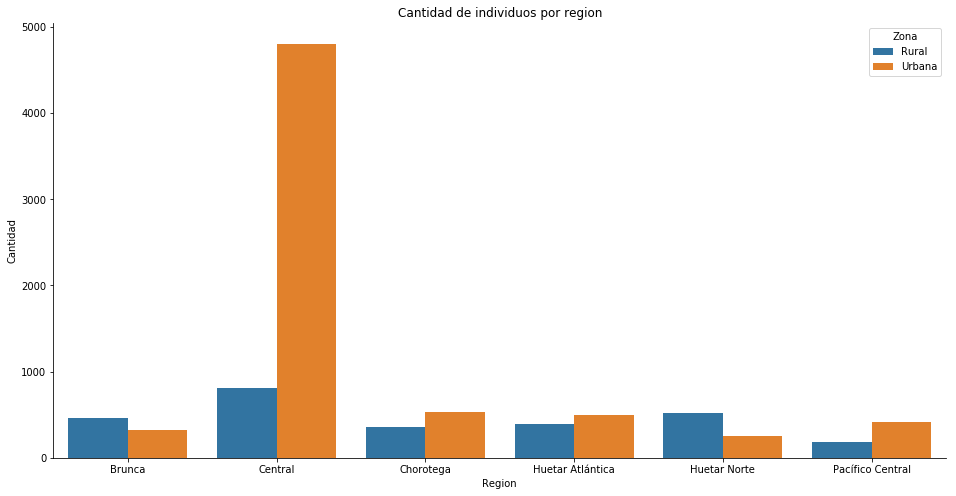

In [45]:
print("Cantidad total de individuos: " + str(_ds['Id'].nunique()));

ds_by = _ds.groupby(['Region', 'Zona'])['Id'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x="Region", hue="Zona",y="Id" ,data=ds_by)
ax.set( ylabel='Cantidad', xlabel='Region',title='Cantidad de individuos por region')
sns.despine()

In [145]:
# Porcentaje de poblacion por region y zona
ds_by = _ds.groupby(['Region', 'Zona'])['Id'].nunique().reset_index()
ds_by['Porcentaje'] = (ds_by['Id']/ds_by['Id'].sum())*100
ds_by

,Region,Zona,Id,Porcentaje
0,Brunca,Rural,463,4.844617
1,Brunca,Urbana,328,3.432039
2,Central,Rural,810,8.475463
3,Central,Urbana,4806,50.287747
4,Chorotega,Rural,352,3.683164
5,Chorotega,Urbana,534,5.587527
6,Huetar Atlántica,Rural,397,4.154023
7,Huetar Atlántica,Urbana,500,5.231767
8,Huetar Norte,Rural,523,5.472429
9,Huetar Norte,Urbana,248,2.594957


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


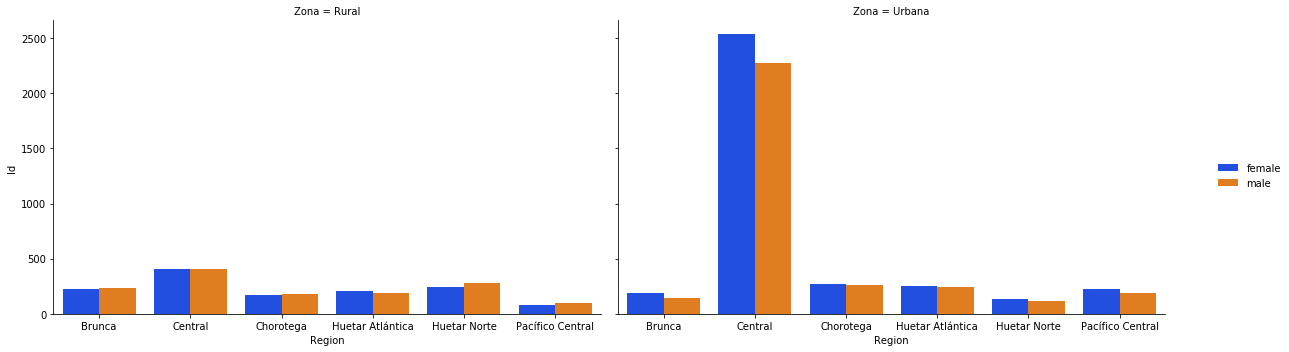

In [47]:
region_zona_target = _ds.groupby(['Region', 'Zona','Genero']).nunique()['Id'].reset_index()

g = sns.FacetGrid(region_zona_target, col="Zona", margin_titles=True,  height=5, aspect=1.7)
(g.map(sns.barplot, "Region", "Id",'Genero',palette='bright' )).add_legend()
sns.despine()

-----------Cantidad de individuos por nivel de pobreza de acuerdo al genero, region y zona a la que pertenecen------------


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


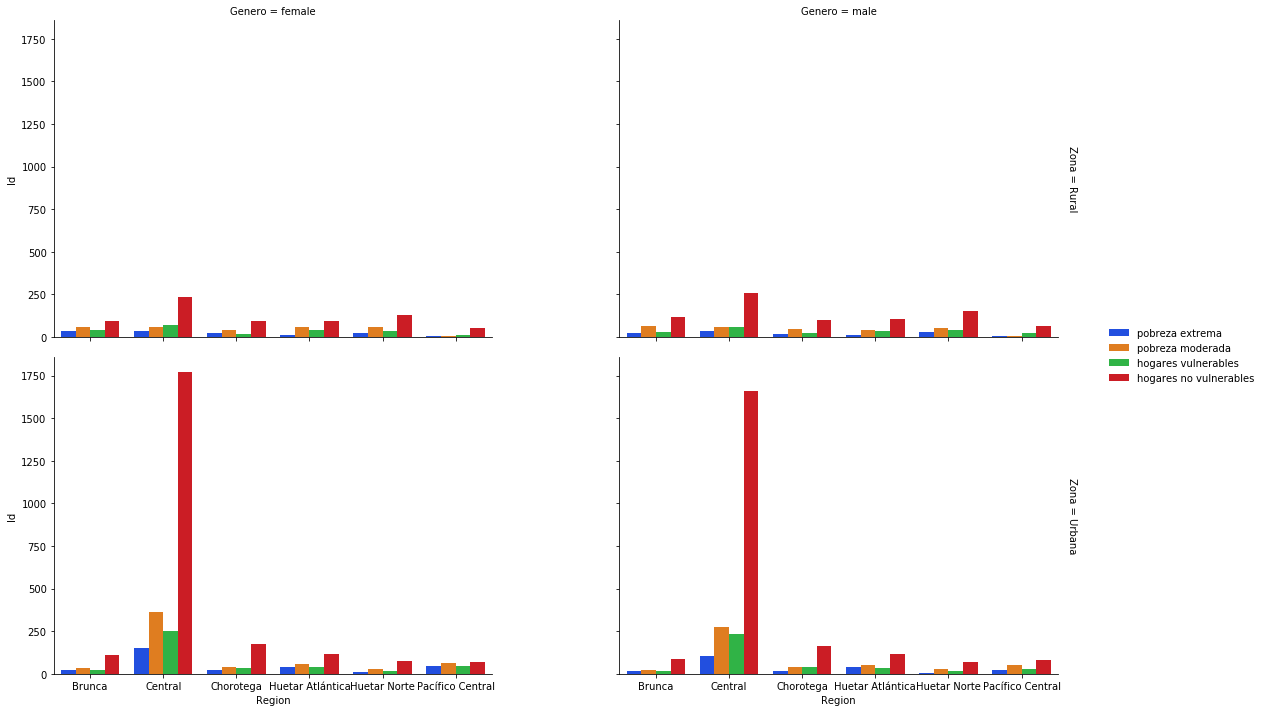

In [48]:
region_zona_target = _ds.groupby(['Region', 'Zona','Genero','Target']).nunique()['Id'].reset_index()

print("-----------Cantidad de individuos por nivel de pobreza de acuerdo al genero, region y zona a la que pertenecen------------")
g = sns.FacetGrid(region_zona_target, row="Zona", col="Genero", margin_titles=True,   height=5, aspect=1.7, hue_order=["1", "2", "3", "4"])
(g.map(sns.barplot, "Region", "Id",'Target',palette='bright' )).add_legend()
new_labels = ['pobreza extrema', 'pobreza moderada','hogares vulnerables','hogares no vulnerables']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for ax in g.axes.flat:
  box = ax.get_position()
  ax.set_position([box.x0,box.y0,box.width*0.8,box.height])
sns.despine()

Cantidad total de hogares: 2988


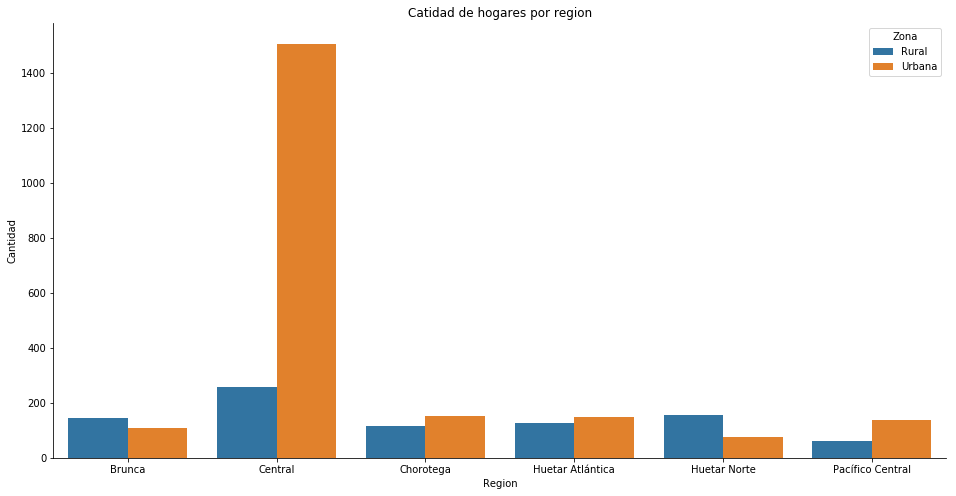

In [49]:
print("Cantidad total de hogares: " + str(_ds['idhogar'].nunique()));

ds_by = _ds.groupby(['Region', 'Zona'])['idhogar'].nunique().reset_index()
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x="Region", hue="Zona",y="idhogar" ,data=ds_by)
ax.set( ylabel='Cantidad', xlabel='Region',title='Catidad de hogares por region')
sns.despine()


# REGION CENTRAL
* Desde el punto de vista del individuo
* Desde el punto de vista del hogar


---



## Conocimientos previos
* Region Central es el 58% de la muestra.


In [51]:
q_no_jefe_female_rural = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==0) & (central_zona_genero_parentesco1['Genero']=='female') &  (central_zona_genero_parentesco1['Zona']=='Rural') ]['Id'].sum()
q_jefe_female_rural = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==1) & (central_zona_genero_parentesco1['Genero']=='female') &  (central_zona_genero_parentesco1['Zona']=='Rural') ]['Id'].sum()
q_no_jefe_female_urbano = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==0) & (central_zona_genero_parentesco1['Genero']=='female') &  (central_zona_genero_parentesco1['Zona']=='Urbana') ]['Id'].sum()
q_jefe_female_urbano = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==1) & (central_zona_genero_parentesco1['Genero']=='female') &  (central_zona_genero_parentesco1['Zona']=='Urbana') ]['Id'].sum()

q_no_jefe_male_rural = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==0) & (central_zona_genero_parentesco1['Genero']=='male') &  (central_zona_genero_parentesco1['Zona']=='Rural') ]['Id'].sum()
q_jefe_male_rural = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==1) & (central_zona_genero_parentesco1['Genero']=='male') &  (central_zona_genero_parentesco1['Zona']=='Rural') ]['Id'].sum()
q_no_jefe_male_urbano = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==0) & (central_zona_genero_parentesco1['Genero']=='male') &  (central_zona_genero_parentesco1['Zona']=='Urbana') ]['Id'].sum()
q_jefe_male_urbano = central_zona_genero_parentesco1[(central_zona_genero_parentesco1['parentesco1']==1) & (central_zona_genero_parentesco1['Genero']=='male') &  (central_zona_genero_parentesco1['Zona']=='Urbana') ]['Id'].sum()


print("Cantidad de mujeres no jefas de hogar en zona rural en region Centro: "+ str(q_no_jefe_female_rural))
print("Cantidad de mujeres jefas de hogar en zona rural en region Centro: "+ str(q_jefe_female_rural))
print("Cantidad de mujeres no jefas de hogar en zona urbana en region Centro: "+ str(q_no_jefe_female_urbano))
print("Cantidad de mujeres jefas de hogar en zona urbana en region Centro: "+ str(q_jefe_female_urbano))
print("")
print("Cantidad de hombres no jefes de hogar en zona rural en region Centro: "+ str(q_no_jefe_male_rural))
print("Cantidad de hombres jefes de hogar en zona rural en region Centro: "+ str(q_jefe_male_rural))
print("Cantidad de hombres no jefes de hogar en zona urbana en region Centro: "+ str(q_no_jefe_male_urbano))
print("Cantidad de hombres jefes de hogar en zona urbana en region Centro: "+ str(q_jefe_male_urbano))

Cantidad de mujeres no jefas de hogar en zona rural en region Centro: 328
Cantidad de mujeres jefas de hogar en zona rural en region Centro: 76
Cantidad de mujeres no jefas de hogar en zona urbana en region Centro: 1892
Cantidad de mujeres jefas de hogar en zona urbana en region Centro: 642

Cantidad de hombres no jefes de hogar en zona rural en region Centro: 230
Cantidad de hombres jefes de hogar en zona rural en region Centro: 176
Cantidad de hombres no jefes de hogar en zona urbana en region Centro: 1409
Cantidad de hombres jefes de hogar en zona urbana en region Centro: 863


Cantidad de jefes/as de hogar de la region Central teniendo en cuenta el genero y la zona a la cual pertenecen.


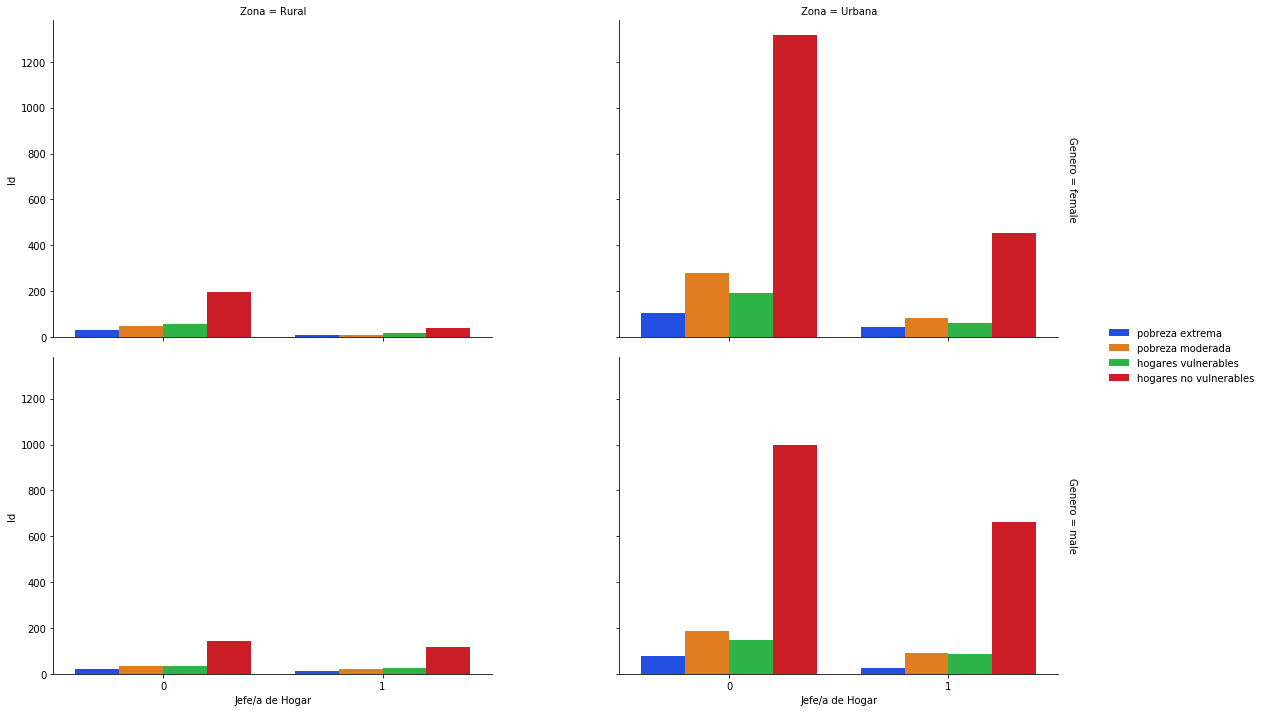

In [52]:
import warnings
warnings.filterwarnings("ignore")
print("Cantidad de jefes/as de hogar de la region Central teniendo en cuenta el genero y la zona a la cual pertenecen.");
central_zona_genero_parentesco1 = _ds[_ds['Region']=='Central'].groupby(['Zona','Genero','parentesco1', 'Target']).nunique()['Id'].reset_index()

g = sns.FacetGrid(central_zona_genero_parentesco1, col="Zona", row='Genero', margin_titles=True,  height=5, aspect=1.7)
(g.map(sns.barplot, "parentesco1", "Id",'Target',palette='bright' )).add_legend()
new_labels = ['pobreza extrema', 'pobreza moderada','hogares vulnerables','hogares no vulnerables']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
for ax in g.axes.flat:
  box = ax.get_position()
  ax.set_position([box.x0,box.y0,box.width*0.8,box.height])
g.axes[1,0].set_xlabel('Jefe/a de Hogar')
g.axes[1,1].set_xlabel('Jefe/a de Hogar')  
sns.despine()

In [53]:
row_parentesco_1 = _ds[_ds['parentesco1']==1]
print("Cantidad de hogares con multiples jefes de hogar:"+str(len(row_parentesco_1[row_parentesco_1.idhogar.duplicated(keep=False)].sort_values(by='idhogar'))))

hogares_central_jefe_female_urbana = _ds[(_ds['Region']=='Central')&(_ds['Genero']=='female')&(_ds['Zona']=='Urbana')]
hogares_central_jefe_female_urbana[['parentesco1','parentesco2','parentesco3','parentesco4','parentesco5','parentesco6',
                                    'parentesco7','parentesco8','parentesco9','parentesco10','parentesco11','parentesco12']].describe()

Cantidad de hogares con multiples jefes de hogar:0


,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,0.253354,0.277032,0.341752,0.008682,0.009866,0.052486,0.013812,0.003552,0.013418,0.003552,0.014601,0.007893
std,0.435018,0.447621,0.474391,0.092790,0.098855,0.223049,0.116734,0.059502,0.115077,0.059502,0.119975,0.088507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analisis de Renta Mensual

No handles with labels found to put in legend.


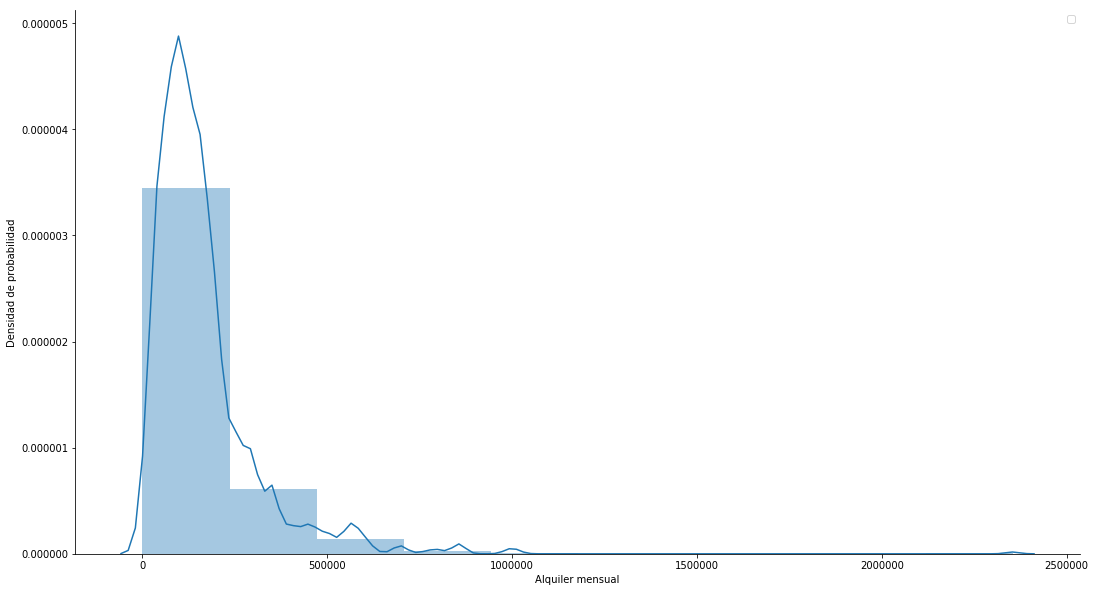

In [54]:
#Como se distribuye el alquiler mensual del dataset? Y si observamos la distribución para cada clase? v2a1

plt.figure(figsize=(18,10))
sns.distplot(_ds['v2a1'], bins=10)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Alquiler mensual')
plt.legend()
sns.despine()

No handles with labels found to put in legend.


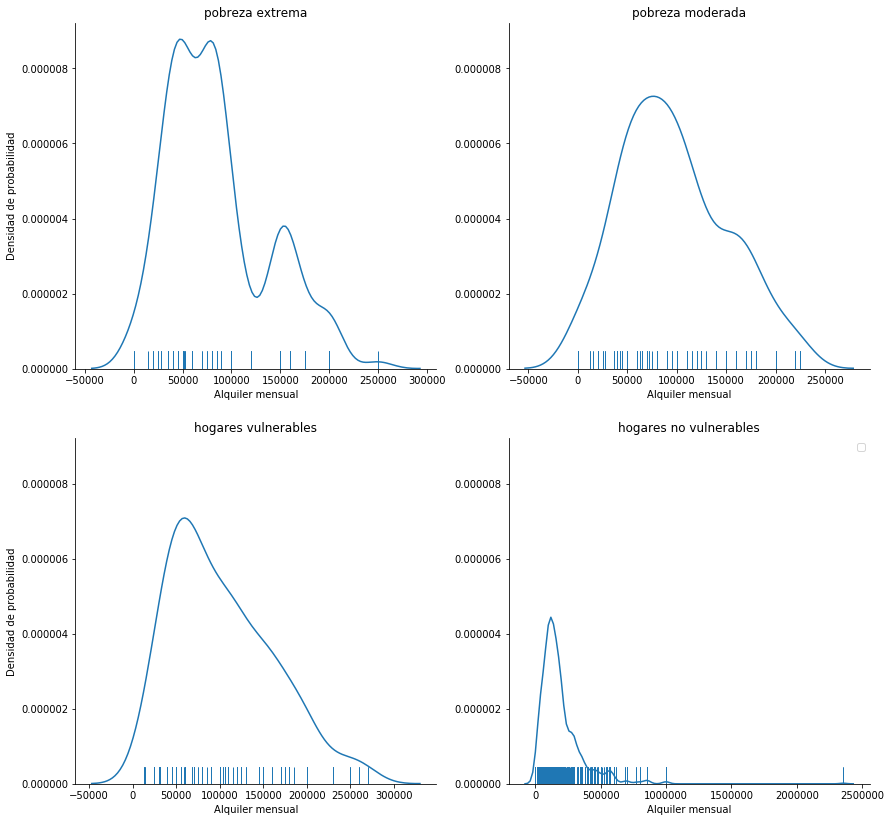

In [55]:
plt.figure(figsize=(22,14))
ax1 = plt.subplot2grid((2,3),(0,0))
sns.distplot(_ds[_ds['Target']==1]['v2a1'],hist=False, rug=True)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Alquiler mensual')
plt.title('pobreza extrema')
plt.subplot2grid((2,3),(0,1), sharey=ax1)
sns.distplot(_ds[_ds['Target']==2]['v2a1'],hist=False, rug=True)
plt.xlabel('Alquiler mensual')
plt.title('pobreza moderada')
plt.subplot2grid((2,3),(1,0), sharey=ax1)
sns.distplot(_ds[_ds['Target']==3]['v2a1'], hist=False, rug=True)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Alquiler mensual')
plt.title('hogares vulnerables')
plt.subplot2grid((2,3),(1,1), sharey=ax1)
sns.distplot(_ds[_ds['Target']==4]['v2a1'],hist=False, rug=True)
plt.xlabel('Alquiler mensual')
plt.title('hogares no vulnerables')

plt.legend()
sns.despine()

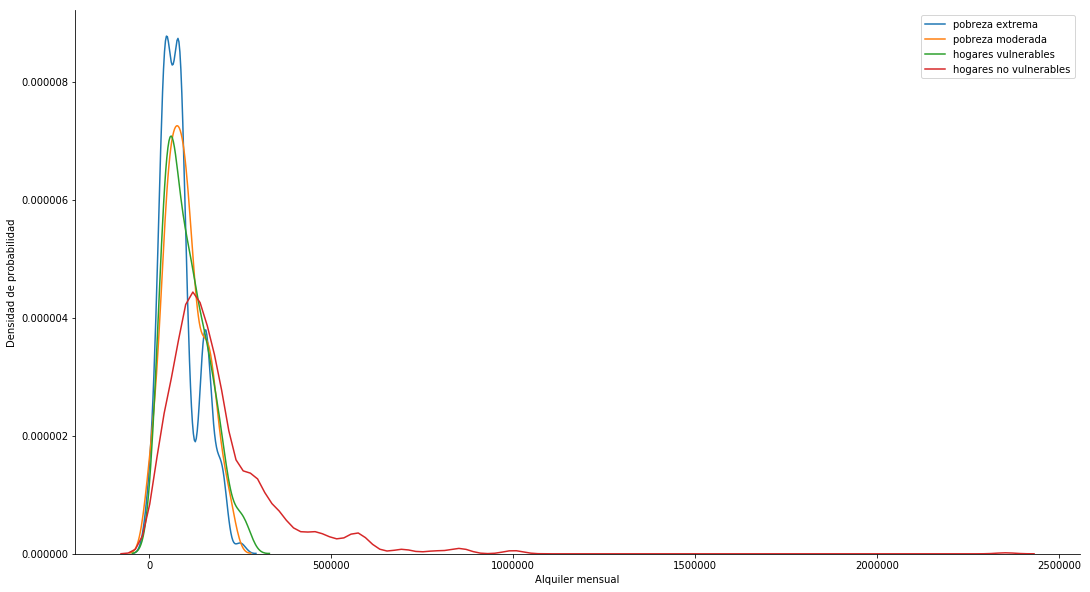

In [56]:
plt.figure(figsize=(18,10))

sns.distplot(_ds[_ds['Target']==1]['v2a1'], bins=10, label='pobreza extrema',hist=False)
sns.distplot(_ds[_ds['Target']==2]['v2a1'], bins=10, label='pobreza moderada',hist=False)
sns.distplot(_ds[_ds['Target']==3]['v2a1'], bins=10, label='hogares vulnerables',hist=False)
sns.distplot(_ds[_ds['Target']==4]['v2a1'], bins=10, label='hogares no vulnerables',hist=False)
plt.ylabel('Densidad de probabilidad')
plt.xlabel('Alquiler mensual')
plt.legend()
sns.despine()

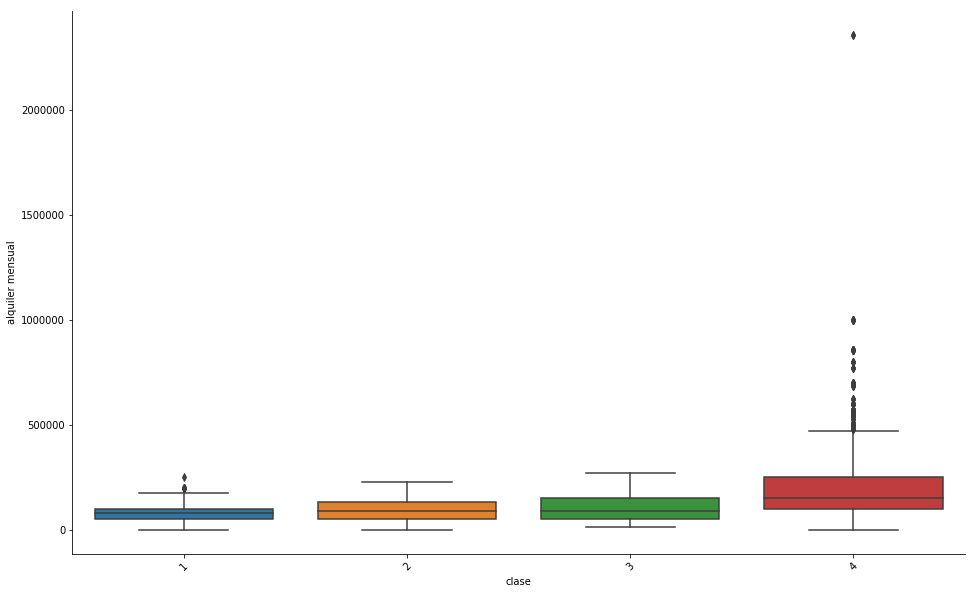

In [57]:
plt.figure(figsize=(16,10))
sns.boxplot(data=_ds, x='Target', y='v2a1')
plt.ylabel('alquiler mensual')
plt.xlabel('clase')
plt.xticks(rotation=45)
sns.despine()

In [58]:
#Cuántos individuos que viven en hogares de extrema pobreza pagan un alquiler mensual mayor a 165.000 u.m.? Y más de 500.000?
q_alquiler_mensual_plus_165 = _ds[(_ds['Target']==1)&(_ds['v2a1']>165000)]
q_alquiler_mensual_plus_500 = _ds[(_ds['Target']==1)&(_ds['v2a1']>500000)]
print("Cantidad de individuos con pobreza extrema que pagan mas de 165k: "+ str(len(q_alquiler_mensual_plus_165)))
print("Cantidad de individuos con pobreza extrema que pagan mas de 500k: "+ str(len(q_alquiler_mensual_plus_500)))
print("Cantidad de hogares con probreza extrema que pagan mas de 165: "+ str(len(q_alquiler_mensual_plus_165['idhogar'].unique())))


Cantidad de individuos con pobreza extrema que pagan mas de 165k: 13
Cantidad de individuos con pobreza extrema que pagan mas de 500k: 0
Cantidad de hogares con probreza extrema que pagan mas de 165: 3


In [59]:
#Cómo se correlacionan el tamaño del hogar o la vivienda con el alquiler mensual?
_ds[['tamhog', 'tamviv', 'hhsize','rooms','v2a1']].describe()

,tamhog,tamviv,hhsize,rooms,v2a1
count,9557.000000,9557.000000,9557.000000,9557.000000,2.697000e+03
mean,3.999058,4.094590,3.999058,4.955530,1.652316e+05
std,1.772216,1.876428,1.772216,1.468381,1.504571e+05
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,3.000000,3.000000,3.000000,4.000000,8.000000e+04
50%,4.000000,4.000000,4.000000,5.000000,1.300000e+05
75%,5.000000,5.000000,5.000000,6.000000,2.000000e+05
max,13.000000,15.000000,13.000000,11.000000,2.353477e+06


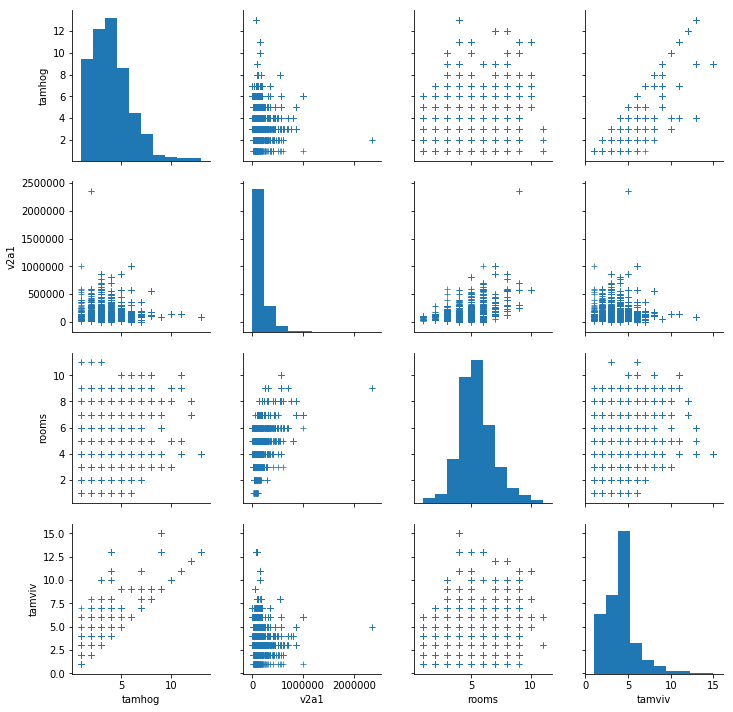

In [60]:
sns.pairplot(
    data=_ds,
    vars=['tamhog', 'v2a1', 'rooms', 'tamviv'],
    
    markers='+')
sns.despine()

<Figure size 720x432 with 0 Axes>

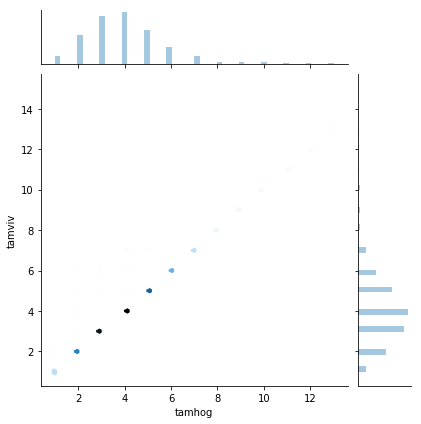

In [61]:
plt.figure(figsize=(10,6))
sns.jointplot(data=_ds,
                  x='tamhog', y='tamviv', kind='hex')
sns.despine()

In [62]:
#Cantidad de personas por intervalos de edad
ranges = [0,7,13,18,64]
_ds.groupby(pd.cut(_ds.age, ranges)).count()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 7]",942,355,942,942,942,942,942,942,224,942,942,942,942,942,942,942,942,942,942,942,942,140,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,942,926,942,940,942,942,942,942,942,942,942,942,942,942
"(7, 13]",840,277,840,840,840,840,840,840,236,840,840,840,840,840,840,840,840,840,840,840,840,839,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,840,836,840,836,840,840,840,840,840,840,840,840,840,840
"(13, 18]",829,247,829,829,829,829,829,829,153,829,829,829,829,829,829,829,829,829,829,829,829,650,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,826,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,825,829,827,829,829,829,829,829,829,829,829,829,829
"(18, 64]",5900,1704,5900,5900,5900,5900,5900,5900,1434,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,0,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5898,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900,5861,5900,5893,5900,5900,5900,5900,5900,5900,5900,5900,5900,5900


In [63]:
# Obtenemos la frecuencia
_ds['parentesco1'].value_counts(normalize = True)

0    0.688919
1    0.311081
Name: parentesco1, dtype: float64

In [64]:
# Obtenemos la cantidad de hogares de la muestra
print('Cantidad de hogares de la muestra:',_ds['idhogar'].unique().shape[0])

Cantidad de hogares de la muestra: 2988


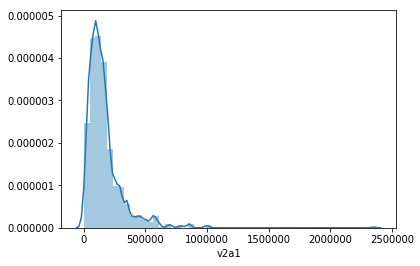

In [65]:
# Graficamos la distribución del alquiler mensual
sns.distplot(_ds['v2a1'].dropna())

In [66]:
# Analizamos la distribución de individuos por edades
_ds['age'].value_counts().sort_index()

0      99
1     120
2     116
3     143
4     139
5     134
6     150
7     140
8     136
9     140
10    138
11    133
12    139
13    154
14    142
15    153
16    180
17    175
18    179
19    170
20    179
21    163
22    166
23    189
24    156
25    146
26    139
27    157
28    159
29    143
30    178
31    131
32    149
33    128
34    120
35    133
36    132
37    122
38    143
39    126
40    118
41     82
42    139
43    132
44     95
45    121
46    111
47    116
48    116
49    111
50    139
51    111
52    135
53    130
54    131
55    109
56    113
57    115
58     94
59     93
60    115
61     75
62     99
63     88
64     83
65     63
66     69
67     68
68     66
69     53
70     69
71     30
72     52
73     43
74     50
75     41
76     39
77     30
78     32
79     26
80     28
81     19
82     24
83     24
84     12
85     18
86     15
87     12
88     11
89     12
90      7
91      8
92      6
93      5
94      7
95      2
97      6
Name: age, dtype: int64

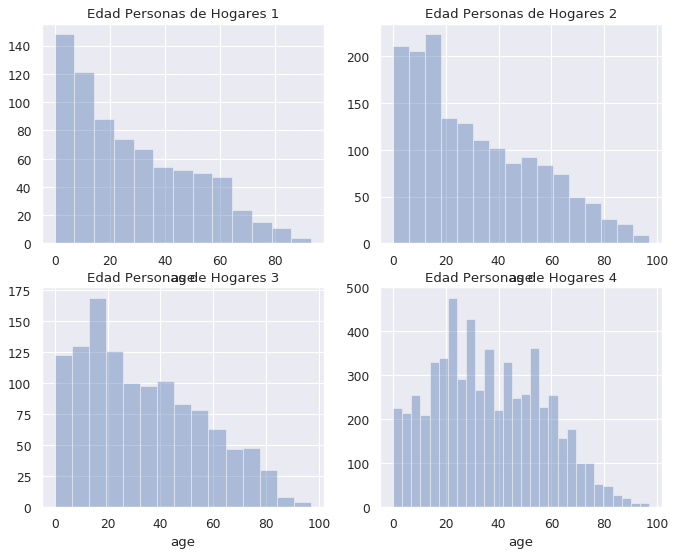

In [67]:
# Analizamos la distribución de la edad de los individuos
from pylab import *
from matplotlib.pyplot import figure
sns.set()
figure(num=None, figsize=(10, 8), dpi=80)
       
subplot(2,2,1)
title('Edad Personas de Hogares 1')
sns.distplot(_ds[_ds['Target'] == 1]['age'],kde=False)
subplot(2,2,2)
title('Edad Personas de Hogares 2')
sns.distplot(_ds[_ds['Target'] == 2]['age'],kde=False)
subplot(2,2,3)
title('Edad Personas de Hogares 3')
sns.distplot(_ds[_ds['Target'] == 3]['age'],kde=False)
subplot(2,2,4)
title('Edad Personas de Hogares 4')
sns.distplot(_ds[_ds['Target'] == 4]['age'],kde=False)

### Distribución de Clases

In [68]:
# Analizamos la distribución de las clases
clases_count = _ds['Target'].value_counts().sort_index()
clases_perc = _ds['Target'].value_counts(normalize = True).sort_index()
_clases_df = pd.DataFrame(data = [clases_count,clases_perc]).transpose()
_clases_df.columns = ['ClassesCount','ClassesPercentage']
_clases_df

,ClassesCount,ClassesPercentage
1,755.0,0.079000
2,1597.0,0.167103
3,1209.0,0.126504
4,5996.0,0.627394


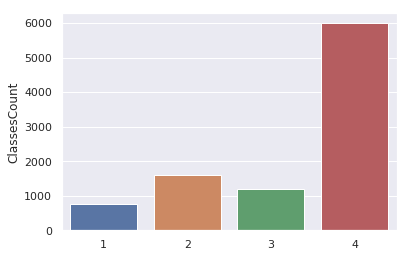

In [69]:
matplotlib.pyplot.clf()
sns.barplot(x =_clases_df.index, y = _clases_df['ClassesCount'])

## Consigna para Informe de Análisis y Visualización

### 1. General

Se propone la **elaboración de un informe** que deberá entregarse en formato html o pdf y deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema.<br>
La estructura del mismo puede seguir un esquema de secciones como el siguiente: **Introducción - Presentación del Dataset - Variables más relevantes o de interés - Respuestas a preguntas disparadoras - Relaciones interesantes entre variables - Principales conclusiones y posibilidad de futuros aportes**. No hay límites respecto a la extensión, pero se valorará el poder de síntesis y de comunicación, así como el uso de las herramientas pertinentes para comunicar.
Pueden tomar, a modo de ejemplo, la sección 4 de __[este informe](http://www.inec.go.cr/sites/default/files/documetos-biblioteca-virtual/enaho-2018.pdf)__.

### 2. Análisis Estadístico de Variables

Se espera un análisis estadístico riguroso de variables que seleccionen por ser de su interés o porque crean que son relevantes (entre 2 y 4). Deberán responder preguntas como:
- Qué **tipo de variable** es cada una? 
- Existen **outliers** en las variables seleccionadas?
- Hay **valores faltantes**? Qué decisión tomarán al respecto en esta instancia de análisis? Es mejor descartarlos o completarlos con un valor particular?
- Cómo es la **distribución** de las variables en el dataset? Se distribuyen de manera normal? Qué implicancias tiene esto?
- Cómo es la **distribución condicionada** a otra variable?

En caso de calcular estadísticos, explicar por qué lo hicieron y su significado. Utilizar los gráficos apropiados para mostrar el análisis realizado.<br>
Además:
- Cuáles son las **tres características con más datos faltantes**?
- Entre qué variables existe más **correlación**?
- Con cuáles variables están más **correlacionadas las clases**?

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

### 3. Preguntas Disparadoras
A continuación se presenta una serie de ***preguntas disparadoras***, a modo de ayuda para encaminar el análisis y la visualización de los datos. Algunas de ellas deberán responderlas de manera obligatoria. 
#### 3.1 De Respuesta Obligatoria

- Como se distribuye el alquiler mensual del dataset? Y si observamos la distribución para cada clase?
- Cuántos individuos que viven en hogares de extrema pobreza pagan un alquiler mensual mayor a 165.000 u.m.? Y más de 500.000?
- Cómo se correlacionan el tamaño del hogar o la vivienda con el alquiler mensual?
- Cómo se relacionan el alquiler mensual con las clases? Explorar las métricas o estadísticos dentro de cada clase y compararlas.
- Cómo se distribuyen los hogares por región y zona?
- Cuál es la región con menor y mayor alquiler mensual promedio? Hay mucha disparidad entre los alquileres de las distintas regiones?
- Cómo se distribuyen los alquileres dentro de cada zona (urbana/rural)? Son estadísticamente distintas las medias de los alquileres entre ambas zonas?
- Cuál es la probabilidad de que un hogar de máxima pobreza se encuentre en una zona rural?
- Quiénes pagan más renta: los hogares con mujeres jefas de hogar o los hogares con hombres jefes de hogar?
- Cómo se distribuyen las clases de hogares según el género de la persona jefa de hogar?
- Cuántos de los hogares de extrema pobreza tienen mujeres como jefas de hogar?
- Cuál es la probabilidad de que una mujer sea jefa de un hogar de extrema pobreza?
- Cuál es la probabilidad de que un hogar sea de extrema pobreza dado que la jefa de hogar es mujer?
- Analizar las personas jefas de hogar por género y edad.

#### 3.2 Adicionales
A modo de ayuda, se propone un listado de preguntas adicionales. Podrán hacer uso de las mismas, aunque no es estrictamente necesario que las respondan a todas. Algunas pueden resultarles de mayor interés que otras.

- Cómo se correlacionan la cantidad de personas total en un hogar con las clases de hogares?
- Cómo se correlacionan los materiales de los distintos aspectos de la vivienda?
- Son variables independientes los materiales de construcción y las clases?
- Son variables independientes el abastecimiento de servicios y las clases?
- Hay computadoras y/o teléfonos celulares en hogares de extrema pobreza? Son independientes las clases de la posesión de este tipo de artículos?
- Cómo se relacionan el tipo de vivienda y el alquiler mensual?
- Hay correlación entre la zona en donde se encuentra la vivienda y el monto de alquiler mensual? Y la región?
- Hay correlación entre la zona en donde se encuentra la vivienda y las clases?

### Algo de Background: Regiones de Costa Rica

![title](https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/resumen-estudios-sociales-de-regiones-de-costa-rica-1-638.jpg)

Para mayor información, pueden consultar el siguiente link: https://es.wikipedia.org/wiki/Regiones_socioecon%C3%B3micas_de_Costa_Rica